Irene Claes r0627946

# Assignment Single Cell RNA Sequencing - Irene Claes

### Overview:
1. Dataset
2. Biological System
3. Library and Loading data
4. Quality Control an Filtering
5. Normalizing the data
6. Identify highly variable genes
7. Scaling data
8. Dimension reduction (PCA)
9. Clustering
10. Non-linear dimensional reduction: t-SNE & UMAP plots
11. Marker discovery
12. Assigning cell types to idified clusters
13. Differential expression analysis between alfa and beta cells
14. Loom file & visualisation
15. GO enrichment
16. Conclusion

## 1. Dataset:
Collect data: 
* raw data: GSE85241, https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE85241
* article: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5092539/

In this dataset, there are 4 human donors (3 men, 1 women).


## 2. Biological System:

Human - Pancreas:

The pancreas functions as both an exocrine and endocrine gland. The endocrine part consists of alpha, beta, delta, pancreatic polypeptide (PP) and epsilon cells. These cells are found on the islets of Langerhans. The alpha cells are responsible for insulin production while the beta cells are responsible for glucagon production. The acinar and ductal cells make up the exocrine compartment. Acinar cells produce digestive enzymes.


## 3. Libraries and loading Data

Inspecting data:
There are 4 donors (D28, D29, D30 and D31), for each donor there are 8 samples.
* D28, D29, D30 = men
* D31 = women

The dataset consist of 19140 genes (row) and 3072 cells (columns).
The dataset will be used for a single cell RNA sequencing analysis

In [81]:
options(stringsAsFactors=FALSE)

library(Seurat)
library(dplyr) 
library(Matrix)
library(SCopeLoomR)
library(IRdisplay)
library(plyr)
library(SCENIC)
library(RColorBrewer)
library(shiny)
options(repr.plot.width=4, repr.plot.height=3)

In [2]:
setwd(path.expand("/home/luna.kuleuven.be/r0627946/data/jupyternotebooks/Assignment1_scRNAseq/"))

Import data: 

In [3]:
rawCounts <- read.table("GSE85241.txt", sep="\t", header=TRUE)

In [4]:
dim(rawCounts)

[1] 19140  3072

In [5]:
head(rawCounts)

D28.1_1  D28.1_2  D28.1_3  D28.1_4  D28.1_5 D28.1_6 D28.1_7
A1BG-AS1__chr19 0.000000 0.000000 0.000000 0.000000 0       0       0      
A1BG__chr19     0.000000 0.000000 1.001958 1.001958 0       0       0      
A1CF__chr10     6.071431 0.000000 2.007853 6.071431 0       0       0      
A2M-AS1__chr12  0.000000 0.000000 0.000000 0.000000 0       0       0      
A2ML1__chr12    0.000000 0.000000 0.000000 0.000000 0       0       0      
A2M__chr12      0.000000 5.049473 0.000000 0.000000 0       0       0      
                D28.1_8 D28.1_9 D28.1_10 ⋯ D30.8_87 D30.8_88 D30.8_89 D30.8_90
A1BG-AS1__chr19 0       0       0        ⋯ 0.000000 0.000000 0.000000 0.000000
A1BG__chr19     0       0       0        ⋯ 0.000000 0.000000 0.000000 0.000000
A1CF__chr10     0       0       0        ⋯ 0.000000 1.001958 7.097484 3.017717
A2M-AS1__chr12  0       0       0        ⋯ 0.000000 0.000000 2.007853 0.000000
A2ML1__chr12    0       0       0        ⋯ 0.000000 0.000000 0.000000 0.000000
A2M__chr12      0       0       0        ⋯ 6.071431 0.000000 0.000000 0.000000
                D30.8_91  D30.8_92 D30.8_93 D30.8_94 D30.8_95 D30.8_96
A1BG-AS1__chr19  0.000000 0.000000 0        0.000000 0        0       
A1BG__chr19      0.000000 0.000000 0        2.007853 0        0       
A1CF__chr10      0.000000 3.017717 0        0.000000 0        0       
A2M-AS1__chr12   1.001958 0.000000 0        0.000000 0        0       
A2ML1__chr12     0.000000 0.000000 0        0.000000 0        0       
A2M__chr12      11.243324 0.000000 0        7.097484 0        0

Look at the columns:

In [6]:
colnames(rawCounts)[600:650]

[1] "D28.7_24" "D28.7_25" "D28.7_26" "D28.7_27" "D28.7_28" "D28.7_29"
 [7] "D28.7_30" "D28.7_31" "D28.7_32" "D28.7_33" "D28.7_34" "D28.7_35"
[13] "D28.7_36" "D28.7_37" "D28.7_38" "D28.7_39" "D28.7_40" "D28.7_41"
[19] "D28.7_42" "D28.7_43" "D28.7_44" "D28.7_45" "D28.7_46" "D28.7_47"
[25] "D28.7_48" "D28.7_49" "D28.7_50" "D28.7_51" "D28.7_52" "D28.7_53"
[31] "D28.7_54" "D28.7_55" "D28.7_56" "D28.7_57" "D28.7_58" "D28.7_59"
[37] "D28.7_60" "D28.7_61" "D28.7_62" "D28.7_63" "D28.7_64" "D28.7_65"
[43] "D28.7_66" "D28.7_67" "D28.7_68" "D28.7_69" "D28.7_70" "D28.7_71"
[49] "D28.7_72" "D28.7_73" "D28.7_74"

In [7]:
genes <- rownames(rawCounts)
genes <- sub("__[^_]+$","",genes)
head(genes)

[1] "A1BG-AS1" "A1BG"     "A1CF"     "A2M-AS1"  "A2ML1"    "A2M"

In [8]:
rawCounts$genes <- genes

In [9]:
which(rawCounts$genes == 'GHRL')

[1] 6289

In [10]:
which(rawCounts$genes == 'XIST')

[1] 18251

In [11]:
which(rawCounts$genes == 'ESAM')

[1] 5083

In [12]:
which(rawCounts$genes == 'MAFB')

[1] 9801

In [13]:
rawCounts[6289:6289, 1:96]

D28.1_1 D28.1_2 D28.1_3 D28.1_4 D28.1_5 D28.1_6 D28.1_7 D28.1_8
GHRL__chr3 0       0       0       0       0       0       0       0      
           D28.1_9 D28.1_10 ⋯ D28.1_87 D28.1_88 D28.1_89 D28.1_90 D28.1_91
GHRL__chr3 0       0        ⋯ 0        0        0        0        0       
           D28.1_92 D28.1_93 D28.1_94 D28.1_95 D28.1_96
GHRL__chr3 0        0        0        0        0

### 3.1. Creating and inspecting meta-data:

In [14]:
metadata<-t(matrix(unlist(strsplit(colnames(rawCounts)[1:3072],".",fixed=TRUE)),nrow=2))

In [15]:
plate<-t(matrix(unlist(strsplit(metadata[,2],"_",fixed=TRUE)),nrow=2))

In [16]:
metadata<-data.frame(donor=metadata[,1],plate=plate[,1])

In [17]:
rownames(metadata)<-colnames(rawCounts)[1:3072]

In [18]:
head(metadata)

donor plate
D28.1_1 D28   1    
D28.1_2 D28   1    
D28.1_3 D28   1    
D28.1_4 D28   1    
D28.1_5 D28   1    
D28.1_6 D28   1

In [19]:
table(metadata)

     plate
donor  1  2  3  4  5  6  7  8
  D28 96 96 96 96 96 96 96 96
  D29 96 96 96 96 96 96 96 96
  D30 96 96 96 96 96 96 96 96
  D31 96 96 96 96 96 96 96 96

There are 4 donors, with each 8 plates. Each plate exist of 96 cells.

In [20]:
index <- as.data.frame(metadata)
head(index)

donor plate
D28.1_1 D28   1    
D28.1_2 D28   1    
D28.1_3 D28   1    
D28.1_4 D28   1    
D28.1_5 D28   1    
D28.1_6 D28   1

### 3.2. Create a Seurat object

In [21]:
GSE_seurat_obj <- CreateSeuratObject(rawCounts, 
                                            min.cells = ncol(rawCounts)/10,
                                            min.features = 1000)
GSE_seurat_obj

Warning message in storage.mode(from) <- "double":
“NAs introduced by coercion”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
10291 features across 2408 samples within 1 assay 
Active assay: RNA (10291 features, 0 variable features)

In total 10291 genes and 2408 cells pass these filtering criteria.

Add the metadata column to the sample group:

In [22]:
GSE_seurat_obj <- AddMetaData(object = GSE_seurat_obj, metadata = index)

In [23]:
head(GSE_seurat_obj@meta.data)

orig.ident nCount_RNA nFeature_RNA donor plate
D28.1_1  D28.1      23175.90   5214         D28   1    
D28.1_2  D28.1      29530.57   5923         D28   1    
D28.1_3  D28.1      16959.13   4965         D28   1    
D28.1_4  D28.1      33613.39   6886         D28   1    
D28.1_5  D28.1      14044.97   4364         D28   1    
D28.1_13 D28.1      22890.73   5550         D28   1

## 4. Quality Control and Filtering
### 4.1. nFeature_RNA & nCount_RNA
In a first step, we look at the nFeature_RNA (the number of genes detected in each cell) and the nCount_RNA (the total number of molecules detected in a cell). Values that are too low for nFeature_RNA and values that are too high for nCount_RNA and nFeature_RNA may be incorrect values. Too low nFeature_RNA can mean that the cell is dead, so that too few genes are detected in this cell. Values that are too high may indicate a multiplet.

There are four donors in this dataset, so we filter by them. In this way it can be seen immediately whether all four donors have a good distribution. Thus, it can be seen that donor 28 appears to have more genes per cell than the other three. Donor 28 and 30 also have some high values for nCount_RNA. This is not the case with donor 29 and 31.

Then the nFeature_RNA and the nCount_RNA are compared in a scatter plot (x-axis: nCount_RNA, y-axis: nFeature_RNA). There are some values that shoot out. These values are removed by creating a subset: filter out cells that have unique gene counts (nFeatures <= 8000 and nCount_RNA <= 50000)

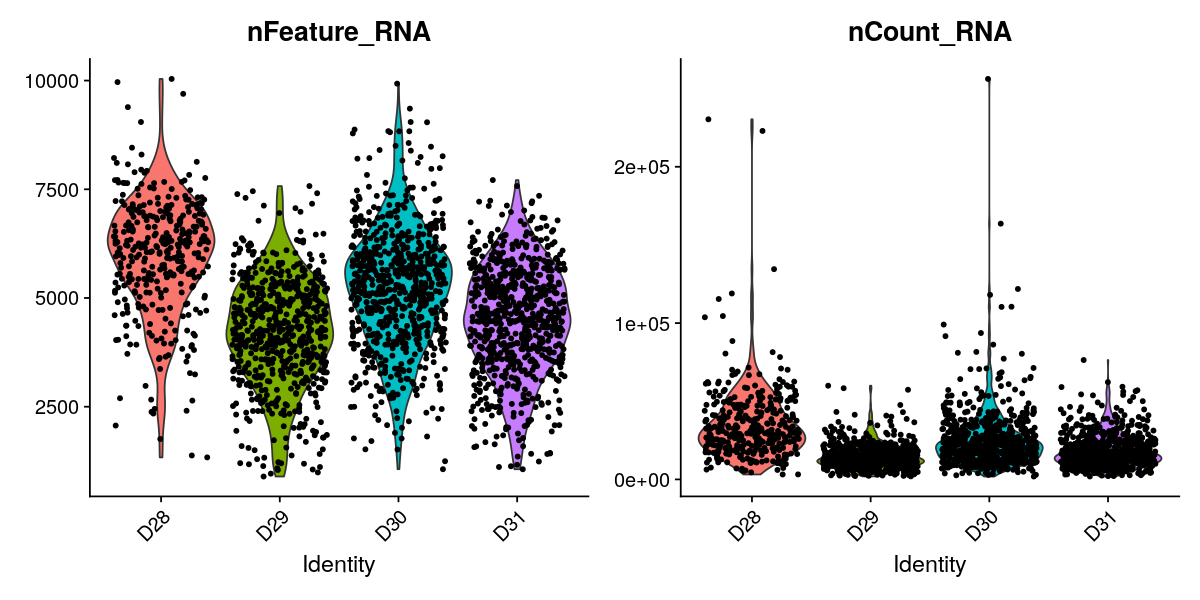

In [24]:
options(repr.plot.width=10,repr.plot.height=5) # to set the figure size
VlnPlot(object = GSE_seurat_obj, features = c("nFeature_RNA","nCount_RNA"), ncol = 2, group.by = "donor")

In [25]:
summary(GSE_seurat_obj@meta.data$nFeature_RNA)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    894    3897    4870    4834    5793   10038 

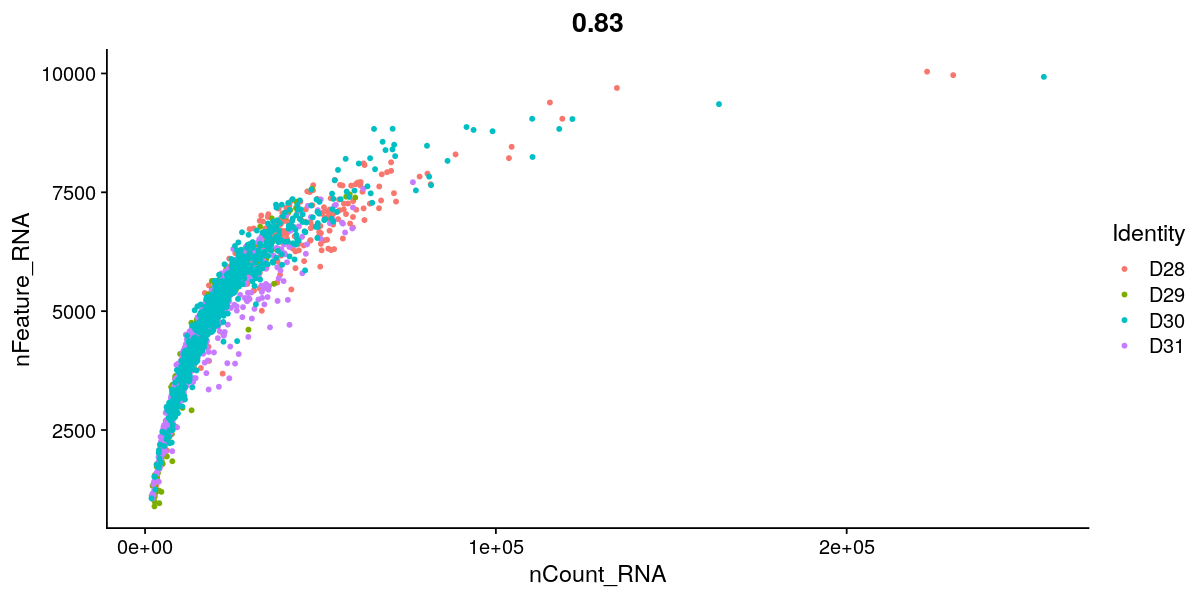

In [26]:
FeatureScatter(object = GSE_seurat_obj, feature1 = "nCount_RNA",feature2 ="nFeature_RNA", group.by = "donor")

In [30]:
GSE_seurat_obj <- subset(GSE_seurat_obj, subset = nFeature_RNA <= 8000 & nCount_RNA <= 50000 )
GSE_seurat_obj

An object of class Seurat 
10291 features across 2280 samples within 1 assay 
Active assay: RNA (10291 features, 0 variable features)

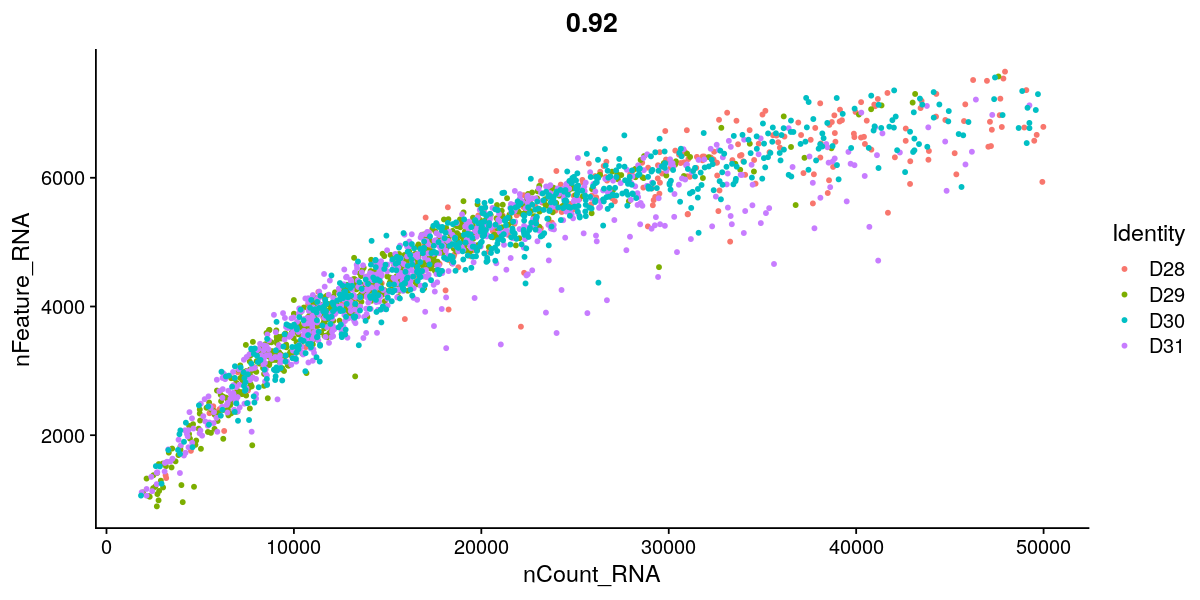

In [31]:
FeatureScatter(object = GSE_seurat_obj, feature1 = "nCount_RNA",feature2 ="nFeature_RNA", group.by = "donor")

## 5. Normalizing the data
The unwanted cells where removed from the dataset. Now the data will be normalized. The default is 'LogNormalize', that normalize the gene expression measurements for each cell by the total expression, then multiply this result with a scale factor and log-transform the result.This step is necessary to be able to compare all cells on the same scale.

In [32]:
GSE_seurat_obj <- NormalizeData(object = GSE_seurat_obj, normalization.method = "LogNormalize")

In [33]:
GetAssayData(GSE_seurat_obj, slot = "data")[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
              D28.1_1   D28.1_2   D28.1_3   D28.1_4 D28.1_5
A1CF--chr10 1.2863959 .         0.7811288 1.0318503       .
AAAS--chr12 0.3593008 .         .         0.2608885       .
AACS--chr12 0.3593008 0.2921435 0.4642416 0.7881830       .
AADAT--chr4 .         .         .         .               .
AAED1--chr9 0.8338185 .         .         0.2608885       .

In [34]:
GetAssayData(GSE_seurat_obj, slot = "counts")[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
             D28.1_1  D28.1_2  D28.1_3  D28.1_4 D28.1_5
A1CF--chr10 6.071431 .        2.007853 6.071431       .
AAAS--chr12 1.001958 .        .        1.001958       .
AACS--chr12 1.001958 1.001958 1.001958 4.031579       .
AADAT--chr4 .        .        .        .              .
AAED1--chr9 3.017717 .        .        1.001958       .

## 6. Identify highly variable genes
The aim of this step is to find highly variable genes, genes with strong cell-to-cell variation within a homogeneous cell population. These genes are a subset of the entire data set, as these genes contain the most information.

The "FindVariableFeatures" function is used for this.

Feature plot:
* By default the subset consist of 2000 features (variable count)
* Non-variable count here is 8291
* The top 10 is highlighted and labeled

Here we identify a set of genes that are highly variable across the dataset. These red collored genes tend to be more cell type specific.

In [35]:
GSE_seurat_obj<- FindVariableFeatures(GSE_seurat_obj)

In [36]:
top10 <- head(VariableFeatures(GSE_seurat_obj),10)

When using repel, set xnudge and ynudge to 0 for optimal results



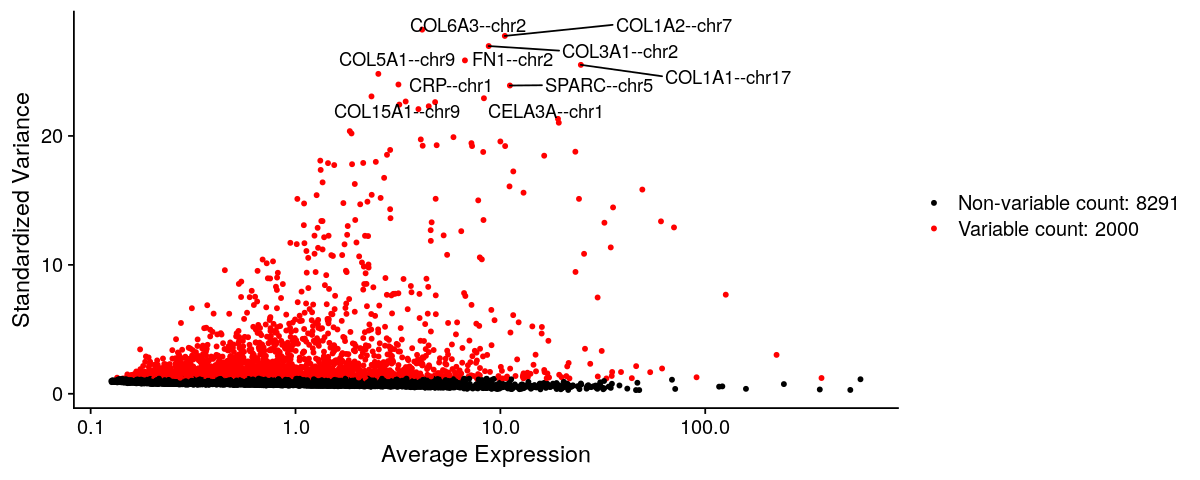

In [37]:
# plot variable features
options(repr.plot.width=10, repr.plot.height=4)
plot1 <- VariableFeaturePlot(GSE_seurat_obj)
plot2 <- LabelPoints(plot=plot1, points=top10, repel = TRUE)
plot2

## 7. Scaling Data

Scaling the data and removing unwanted sources of variation:
* technical noise
* batch effects (non-biological factors)

In [38]:
all.genes <- rownames(GSE_seurat_obj)
length(all.genes)

[1] 10291

In [39]:
GSE_seurat_obj <- ScaleData(GSE_seurat_obj, features = all.genes)

Centering and scaling data matrix



In [40]:
GetAssayData(GSE_seurat_obj, slot = "scale.data")[1:5,1:5]

D28.1_1    D28.1_2    D28.1_3     D28.1_4    D28.1_5   
A1CF--chr10  1.1166559 -1.0434773  0.26820449  0.6892195 -1.0434773
AAAS--chr12  0.9883295 -0.5504409 -0.55044093  0.5668613 -0.5504409
AACS--chr12 -0.2084731 -0.3609395  0.02977293  0.7652136 -1.0241897
AADAT--chr4 -0.3598278 -0.3598278 -0.35982780 -0.3598278 -0.3598278
AAED1--chr9  2.0158517 -0.6661791 -0.66617911  0.1729856 -0.6661791

## 8. Dimension Reduction

Principal Component Analysis (PCA) is used for the redcution dimension.

In [41]:
GSE_seurat_obj <- RunPCA(GSE_seurat_obj, ndims.print = 1:3, nfeatures.print=5)

PC_ 1 
Positive:  IFITM3--chr11, ZFP36L1--chr14, TACSTD2--chr1, NFIB--chr9, SOX4--chr6 
Negative:  CPE--chr4, CHGB--chr20, PAX6--chr11, PCSK2--chr20, SCGN--chr6 
PC_ 2 
Positive:  SPARC--chr5, COL4A1--chr13, COL5A2--chr2, COL15A1--chr9, COL6A3--chr2 
Negative:  ATP1B1--chr1, CDH1--chr16, MUC13--chr3, C15orf48--chr15, ALDH1A1--chr9 
PC_ 3 
Positive:  HADH--chr4, PDX1--chr13, SCD5--chr4, INS--chr11, NPTX2--chr7 
Negative:  FAP--chr2, KCTD12--chr13, IRX2--chr5, GC--chr4, SH3KBP1--chrX 



### 8.1. Visualisation of the principal components:

1) In the first visualization figure, some genes are shown in which a distinction is made via the 4 first principal components.

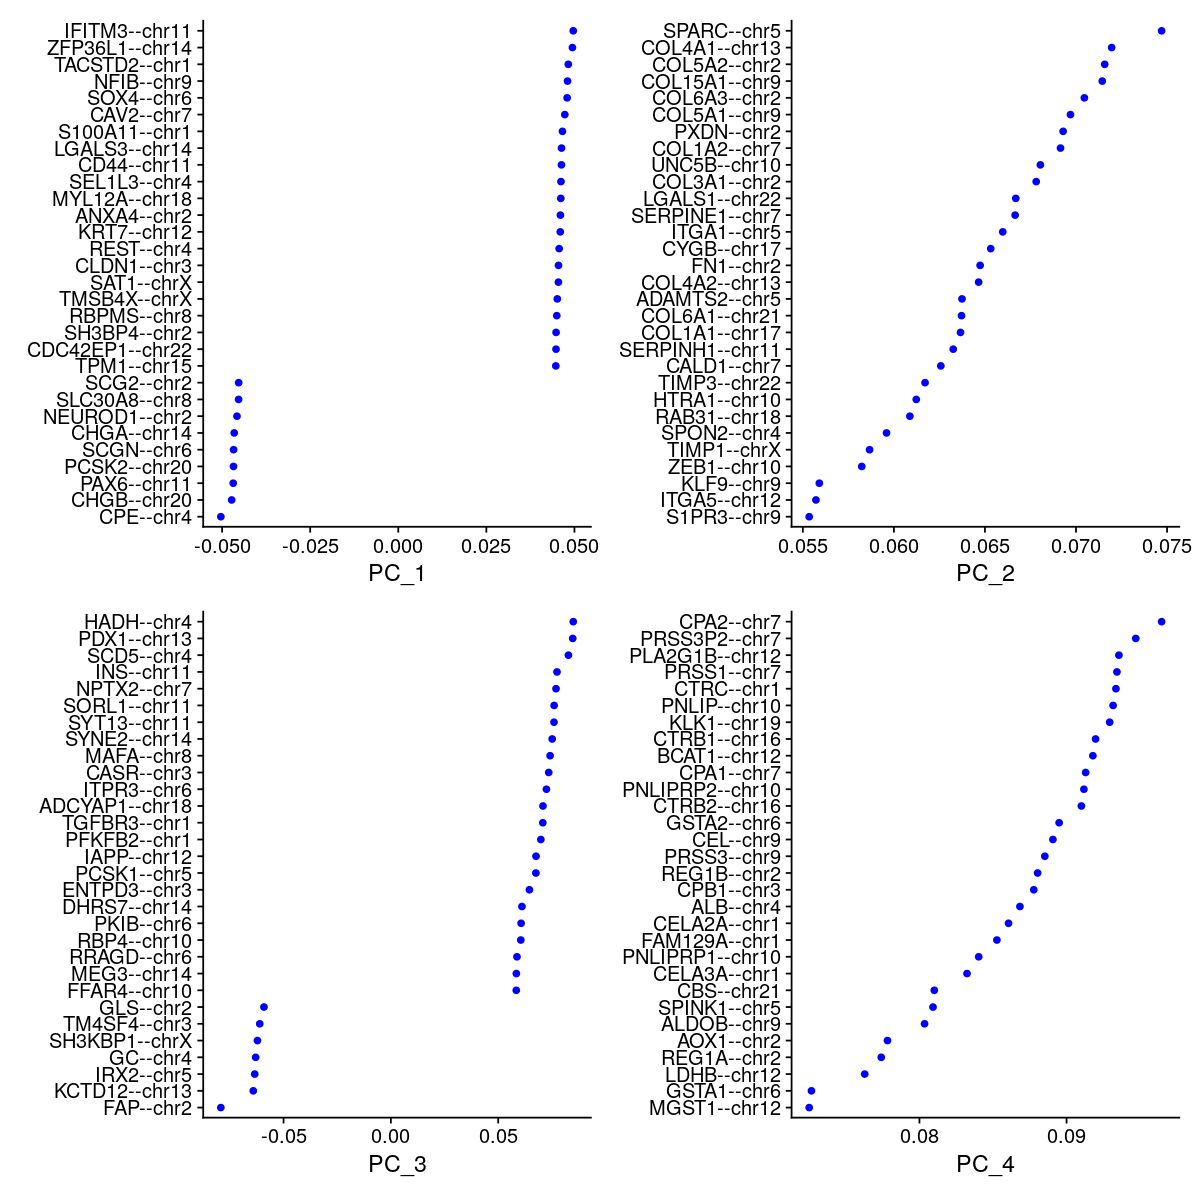

In [42]:
options(repr.plot.width=10, repr.plot.height=10)
VizDimLoadings(GSE_seurat_obj, dims = 1:4, reduction = "pca")

2) In this second visualization figures, all genes are represented in a scatter plot, using the values of PC1, PC2, PC3 and PC4. Initially, it is seen that all donors have cells with genes that are equally distributed. This means that there is no donor with all genes with the same PC value and that all 4 donors contain equivalent information.

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


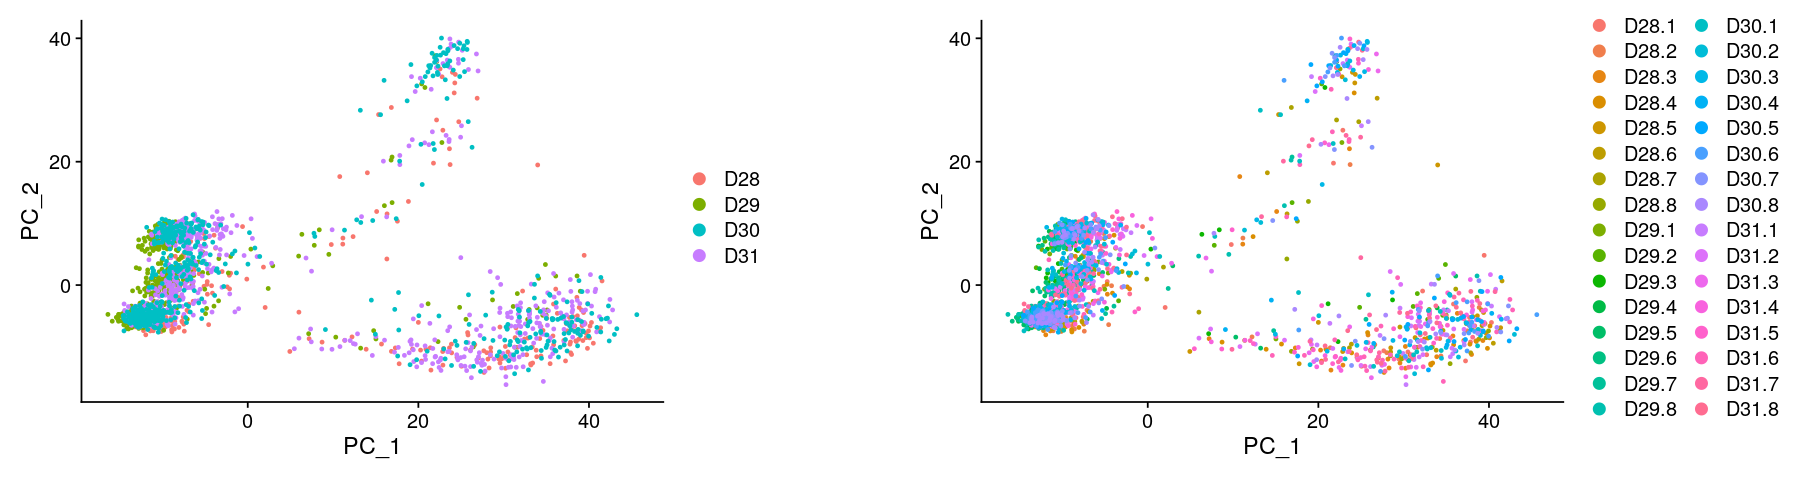

In [43]:
options(repr.plot.width=15, repr.plot.height=4)
plot1 <- DimPlot(GSE_seurat_obj, reduction = "pca", group.by = "donor")
plot2 <- DimPlot(GSE_seurat_obj, reduction = "pca", group.by = "orig.ident")

CombinePlots(plots = list(plot1, plot2))


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


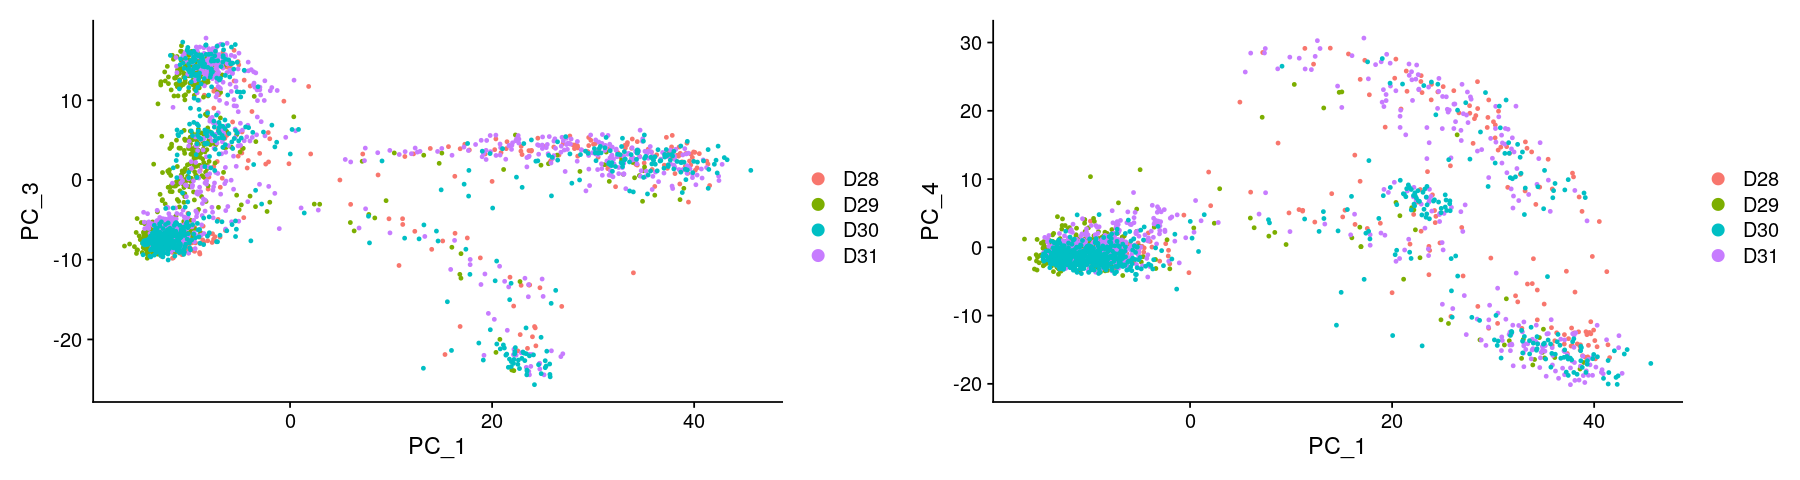

In [44]:
plot3 <- DimPlot(GSE_seurat_obj, reduction = "pca", group.by = "donor", dims = c(1, 3))
plot4 <- DimPlot(GSE_seurat_obj, reduction = "pca", group.by = "donor", dims = c(1, 4))
CombinePlots(plots = list(plot3, plot4))

3) Specific genes are visualized in these figures. These genes are considered important in the accompanying article.

From the article we know that:
* alfa cells: TM4SF4, GCG, MAFB
* beta cells: INS, MAFA, MAFB
* delta cells: STT
* PP cells: PPY
* acinar cells: PRSS1
* mesenchyme cells: COL1A1
* ductal cells: KRT19
* epsilon cells: GHRL
* endothelial cells: ESAM

If we look at these PC1 and PC2 plots, we see that these genes mark a specific part in the scatter plot. This allows certain parts in the scatter plot to be highlighted in certain cells. Based on PC1, a distinction can be made between the set of genes TM4SF4, GCG, INS, MAFA, MAFB and SST and the other set of genes of PRSS1, PPY, COL1A1 and KRT19.

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: GHRL--chr3, ESAM--chr11”


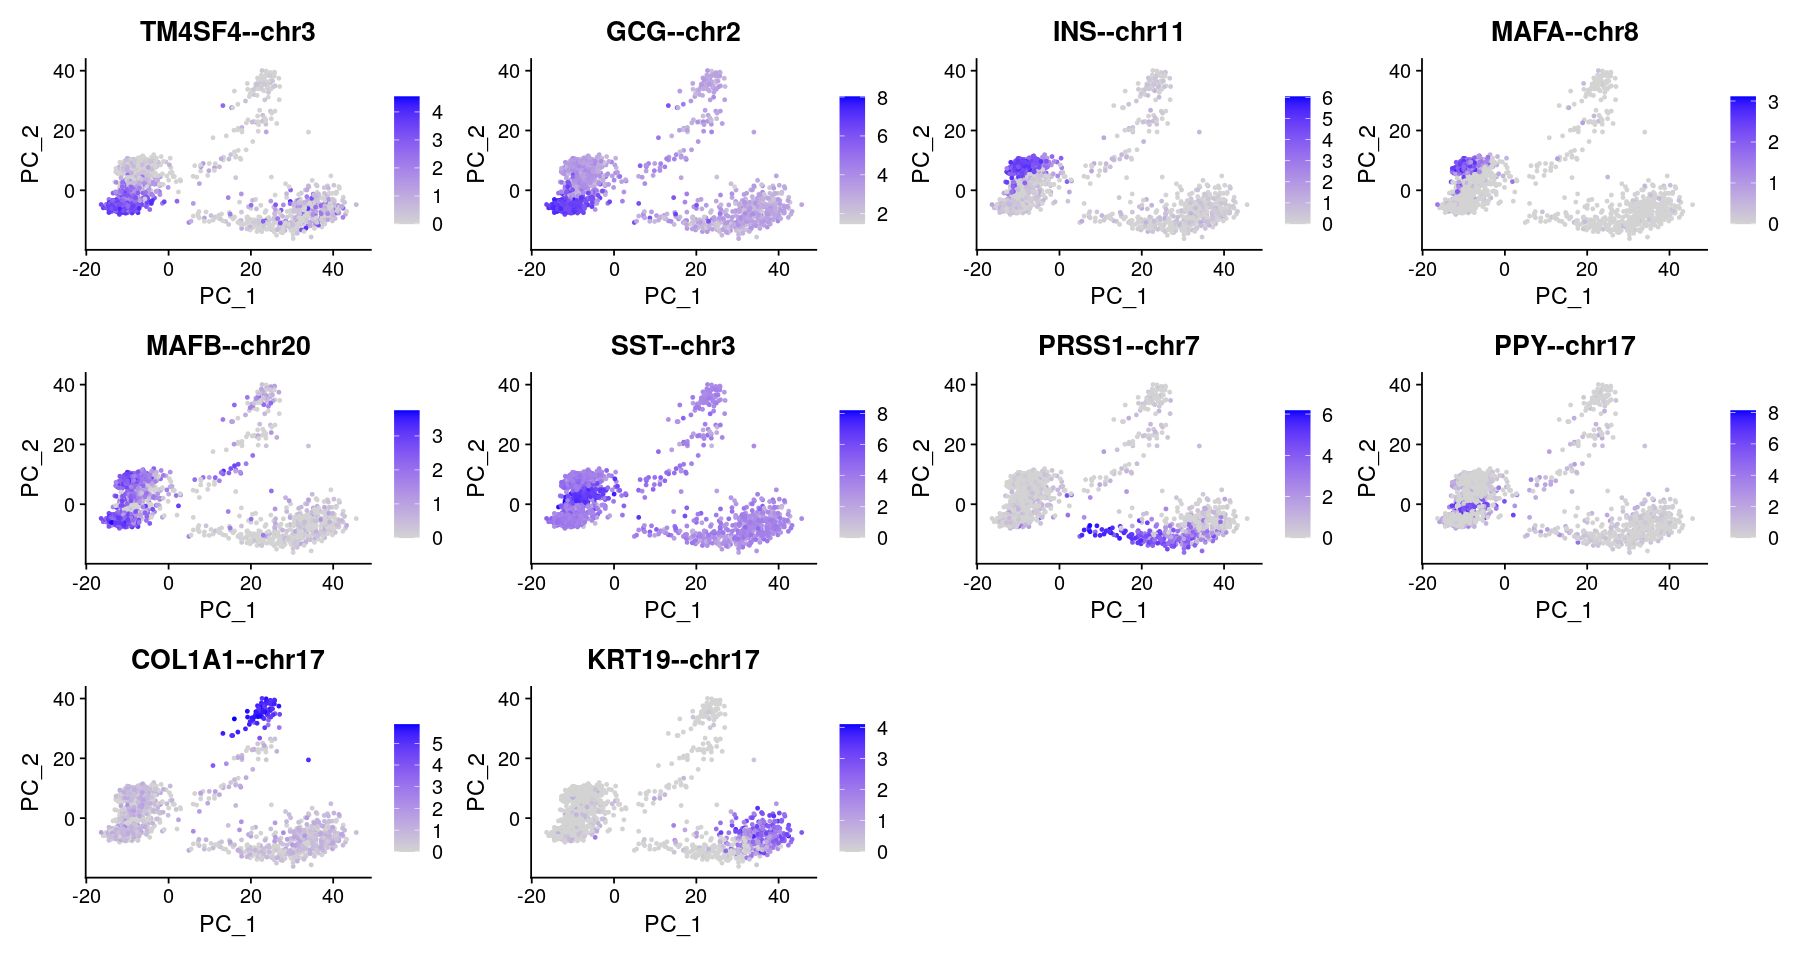

In [45]:
options(repr.plot.width=15, repr.plot.height=8)
FeaturePlot(GSE_seurat_obj, features = c("TM4SF4--chr3",
                                         "GCG--chr2",
                                         "INS--chr11",
                                         "MAFA--chr8",
                                         "MAFB--chr20",
                                         "SST--chr3",
                                         "PRSS1--chr7",
                                         "PPY--chr17",
                                         "COL1A1--chr17",
                                         "KRT19--chr17",
                                         "GHRL--chr3", 
                                         "ESAM--chr11"))

4) Heatmaps: These plots make it clear that there is a clear distinction based on PC1 and somewhat less clear based on PC2 and PC3.

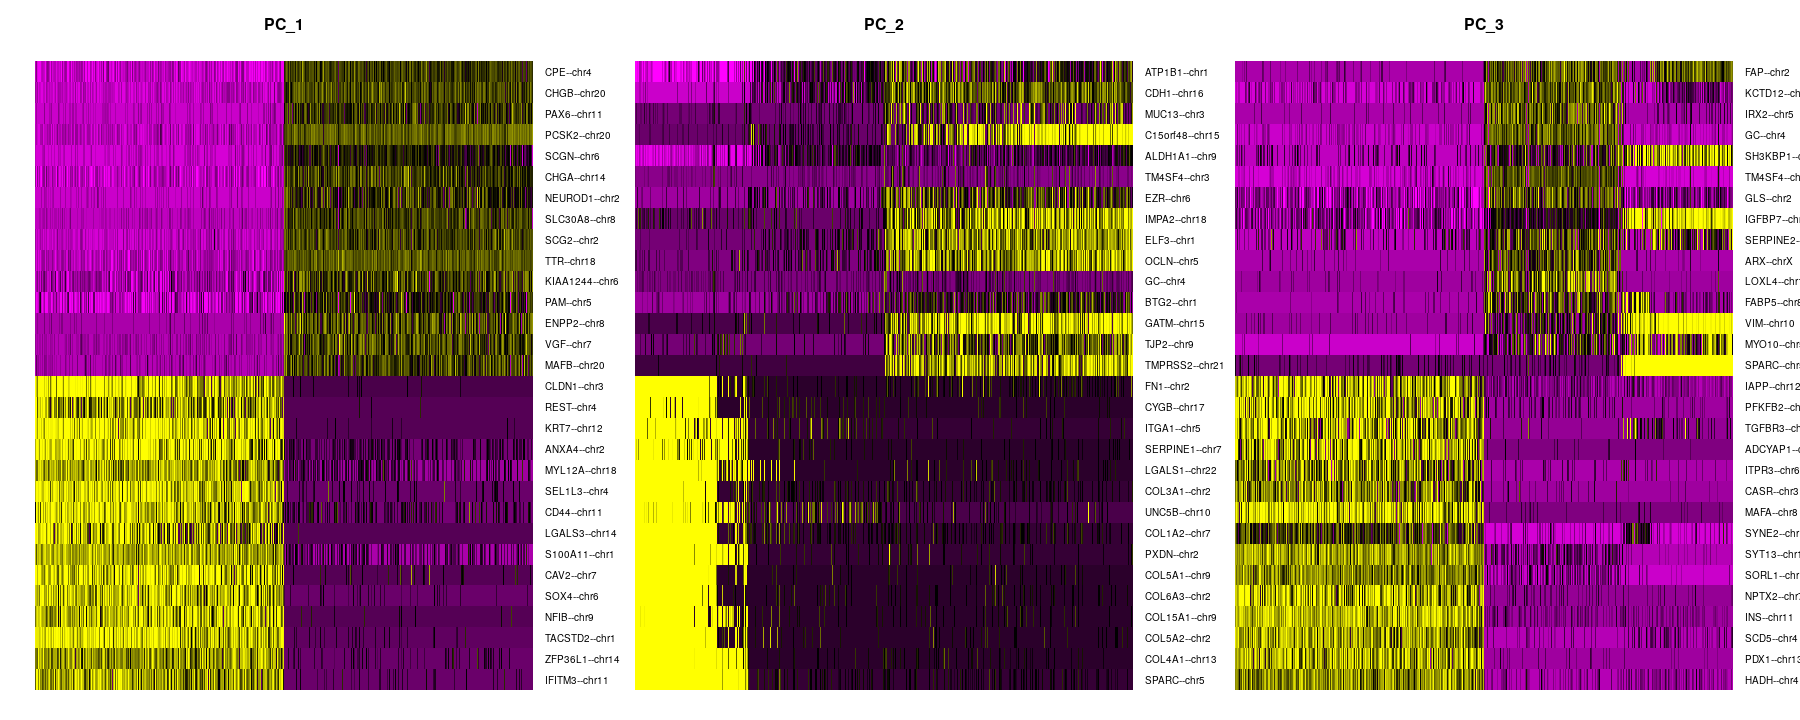

In [46]:
options(repr.plot.width=15, repr.plot.height=6)
DimHeatmap(GSE_seurat_obj, dims = 1:3, cells = 500, balanced = TRUE)

### 8.2. Determine the dimensionality of the dataset
Look at the plot of standard deviations of the principal components => elbow graph: cuttoff: 15-20 PCs

This is done to avoid technical noise, as Seurat clusters cells based on their PCA scores. For this, the most important principal components are chosen on the basis of the elbow graph.

20 principal components are chosen based on this elbow plot.

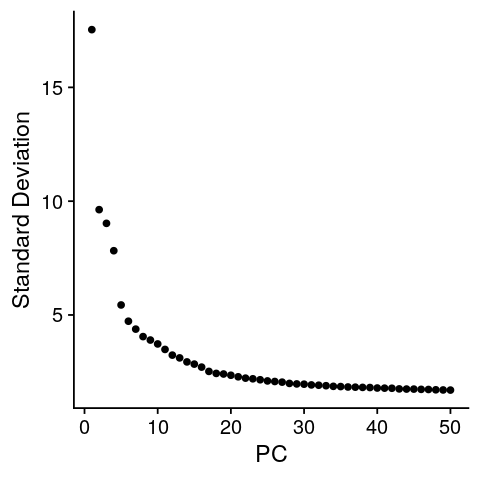

In [47]:
options(repr.plot.width=4, repr.plot.height=4)
ElbowPlot(object = GSE_seurat_obj, ndims = 50)

## 9. Clustering

20 PC's are used for the clustering step. Clusters of cells are formed based on comparable expression profiles. It will also be examined whether the parameter 'resolution' has an influence.

## 9.1. Start values:
Start values: 
* FindNeighbors: based on the fist 20 PC's 
* FindClusters: resolution = 0.5

In [48]:
GSE_seurat_obj <- FindNeighbors(GSE_seurat_obj, dims = 1:20)
GSE_seurat_obj <- FindClusters(GSE_seurat_obj, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2280
Number of edges: 76696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9121
Number of communities: 12
Elapsed time: 0 seconds


## 10. Non-linear dimensioal reduction: t-SNE & UMAP plots: 

t-Distributed Stochastic Neighbor Embedding (t-SNE) and Uniform Manifold Approximation (UMAP): With this Non-linear dimensional reduction the different clusters can be visualized. 20 PCs are also used for this.

In [49]:
GSE_seurat_obj <- RunTSNE(GSE_seurat_obj, dims = 1:20)
GSE_seurat_obj <- RunUMAP(GSE_seurat_obj, dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
17:09:24 UMAP embedding parameters a = 0.9922 b = 1.112

17:09:24 Read 2280 rows and found 20 numeric columns

17:09:24 Using Annoy for neighbor search, n_neighbors = 30

17:09:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

17:09:24 Writing NN index file to temp file /tmp/RtmpyREdxA/filef14696d563880

17:09:24 Searching Annoy index using 1 thread, search_k = 3000

17:09:25 Annoy recall = 100%

17:09:25 Commencing smooth kNN distance calibration using 1 thread

17:09:26 Initializing f

Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


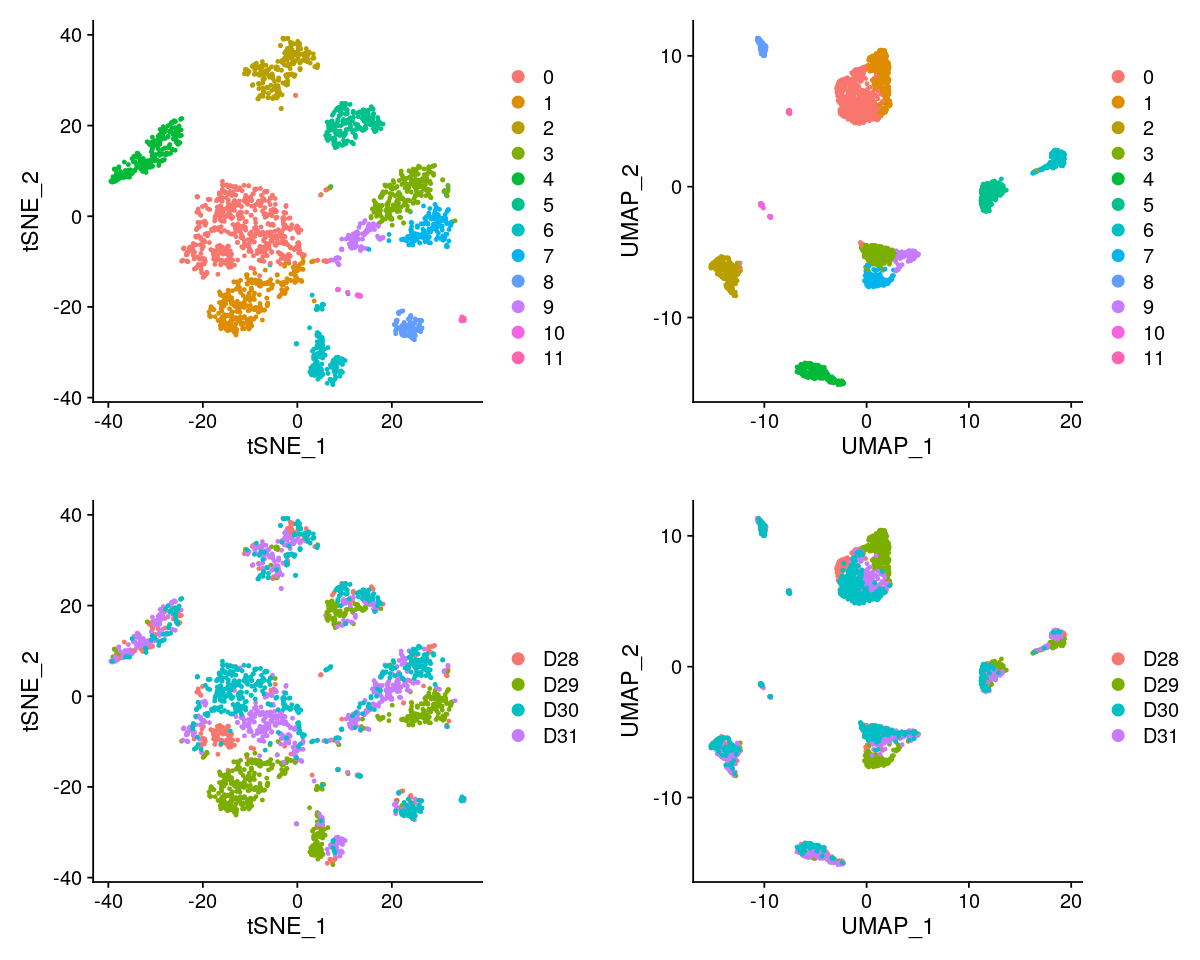

In [50]:
options(repr.plot.width=10, repr.plot.height=8)
plot5 <- DimPlot(GSE_seurat_obj, reduction = "tsne")
plot6 <- DimPlot(GSE_seurat_obj, reduction = "umap")
plot7 <- DimPlot(GSE_seurat_obj, reduction = "tsne", group.by = "donor")
plot8 <- DimPlot(GSE_seurat_obj, reduction = "umap", group.by = "donor")
CombinePlots(plots = list(plot5, plot6, plot7, plot8))

### Resoultion: 0.2

There are 12 clusters, but from the article we know that we are looking for 8-9 clusters. Therefor we change the resolution to 0.2.

In [51]:
GSE_seurat_obj <- FindClusters(GSE_seurat_obj, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2280
Number of edges: 76696

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9554
Number of communities: 8
Elapsed time: 0 seconds


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


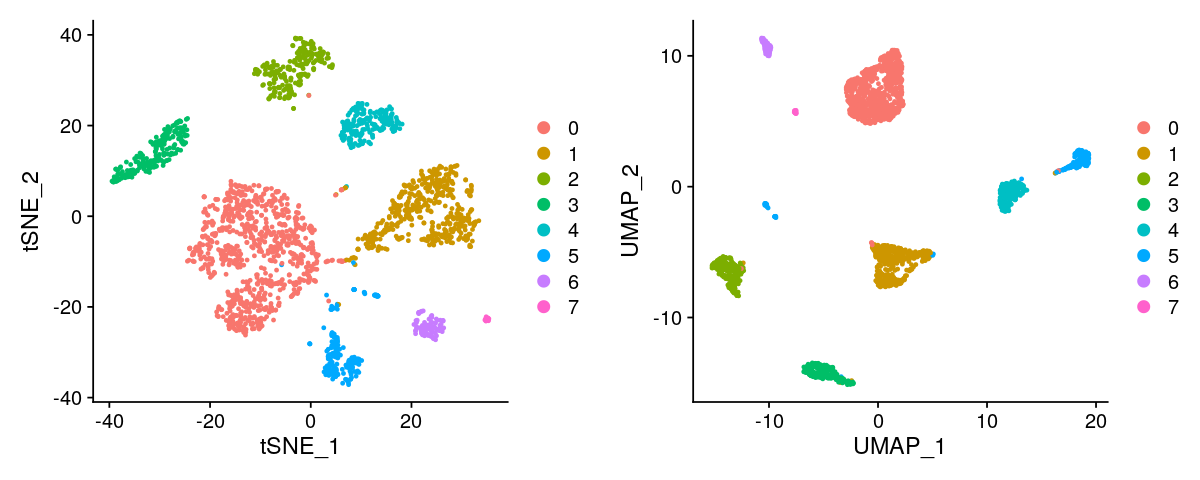

In [52]:
options(repr.plot.width=10, repr.plot.height=4)
plot9 <- DimPlot(GSE_seurat_obj, reduction = "tsne")
plot10 <- DimPlot(GSE_seurat_obj, reduction = "umap")
CombinePlots(plots = list(plot9, plot10))

Now there are 8 clusters, so we can do the marker discovery.

## 11. Marker discovery
* Finding markers via differential expression 

In a first step, all markers are immediately compared between all clusters. The differentially expressed genes are the genes that are distinct from all other clusters. These genes are called markers. The top 5 of these are kept, the top 1 will be visualized and also the genes from the article will be visualized. 

In [53]:
GSE_markers_res0.2 <- FindAllMarkers(object = GSE_seurat_obj, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

# Save the markers 
saveRDS(GSE_markers_res0.2, file = "GSE_markers_cluster_res0.5.rds.gz", compress = "gzip")
# To save as text:
write.table(GSE_markers_res0.2, file = "GSE_markers_res0.5.txt", sep = "\t", quote = F, col.names = F)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



#### Top 5 markers: 

In [54]:
GSE_markers_top5 <- GSE_markers_res0.2 %>% group_by(cluster) %>% top_n(5, avg_logFC)
GSE_markers_top5

p_val         avg_logFC pct.1 pct.2 p_val_adj     cluster gene         
1   0.000000e+00 3.122784  1.000 1.000  0.000000e+00 0       GCG--chr2    
2   0.000000e+00 2.330857  1.000 0.999  0.000000e+00 0       TTR--chr18   
3   0.000000e+00 2.196616  0.988 0.514  0.000000e+00 0       GC--chr4     
4   0.000000e+00 2.019640  0.998 0.591  0.000000e+00 0       TM4SF4--chr3 
5   0.000000e+00 2.016213  0.908 0.138  0.000000e+00 0       LOXL4--chr10 
6   0.000000e+00 1.882625  0.904 0.094  0.000000e+00 1       MAFA--chr8   
7  1.076272e-262 2.094377  0.951 0.260 1.107591e-258 1       NPTX2--chr7  
8  1.634799e-245 3.661841  0.983 0.480 1.682371e-241 1       INS--chr11   
9  4.486060e-181 3.328564  0.975 0.730 4.616604e-177 1       IAPP--chr12  
10 1.275860e-154 1.696467  0.571 0.078 1.312988e-150 1       DLK1--chr14  
11 1.778949e-250 2.923150  0.971 0.131 1.830716e-246 2       CFTR--chr7   
12 1.495266e-230 2.272140  0.860 0.092 1.538779e-226 2       AQP1--chr7   
13 1.843749e-184 2.448194  0.901 0.165 1.897402e-180 2       MMP7--chr11  
14 8.729787e-158 3.319338  0.909 0.237 8.983823e-154 2       SPP1--chr4   
15 1.343380e-137 2.555324  0.992 0.618 1.382472e-133 2       ANXA4--chr2  
16 4.138181e-155 3.822574  0.986 0.312 4.258602e-151 3       PNLIP--chr10 
17 9.444984e-152 3.879147  0.995 0.379 9.719833e-148 3       PRSS1--chr7  
18 3.533588e-137 4.034387  1.000 0.518 3.636416e-133 3       CTRB2--chr16 
19 8.182273e-130 4.193197  1.000 0.570 8.420377e-126 3       REG1B--chr2  
20 5.001032e-128 4.127493  1.000 0.804 5.146562e-124 3       REG1A--chr2  
21 2.731960e-179 1.590755  0.943 0.171 2.811460e-175 4       LEPR--chr1   
22 3.656634e-143 2.209684  0.819 0.139 3.763043e-139 4       PRG4--chr1   
23 8.200050e-116 2.976266  1.000 0.999 8.438671e-112 4       SST--chr3    
24 4.739396e-100 2.339530  1.000 0.662  4.877312e-96 4       RBP4--chr10  
25  1.477540e-91 1.742521  0.995 0.517  1.520536e-87 4       PCSK1--chr5  
26  1.675143e-84 5.115776  0.919 0.547  1.723890e-80 5       PPY--chr17   
27  2.359788e-46 1.317825  0.892 0.712  2.428457e-42 5       ID2--chr2    
28  7.981883e-45 1.259145  0.704 0.399  8.214155e-41 5       ETV1--chr7   
29  3.691212e-23 1.350586  0.656 0.446  3.798627e-19 5       AQP3--chr9   
30  1.391088e-09 1.873991  0.204 0.513  1.431568e-05 5       IFI30--chr19 
31 3.791808e-107 3.730479  0.989 0.188 3.902150e-103 6       FN1--chr2    
32  5.074883e-87 3.837909  1.000 0.275  5.222562e-83 6       SPARC--chr5  
33  9.343049e-84 4.084142  0.967 0.252  9.614932e-80 6       COL3A1--chr2 
34  2.492398e-79 4.135748  0.989 0.315  2.564927e-75 6       COL1A2--chr7 
35  7.077798e-59 4.606258  0.989 0.564  7.283762e-55 6       COL1A1--chr17
36  8.331546e-47 2.646968  1.000 0.110  8.573994e-43 7       PODXL--chr7  
37  1.491082e-37 2.956497  0.955 0.127  1.534472e-33 7       THBS1--chr15 
38  1.609341e-37 2.762039  1.000 0.146  1.656173e-33 7       PPAP2B--chr1 
39  1.351468e-32 2.702318  1.000 0.173  1.390796e-28 7       HTRA1--chr10 
40  5.997927e-30 2.632082  1.000 0.182  6.172467e-26 7       COL4A1--chr13

#### Top 1 markers: 

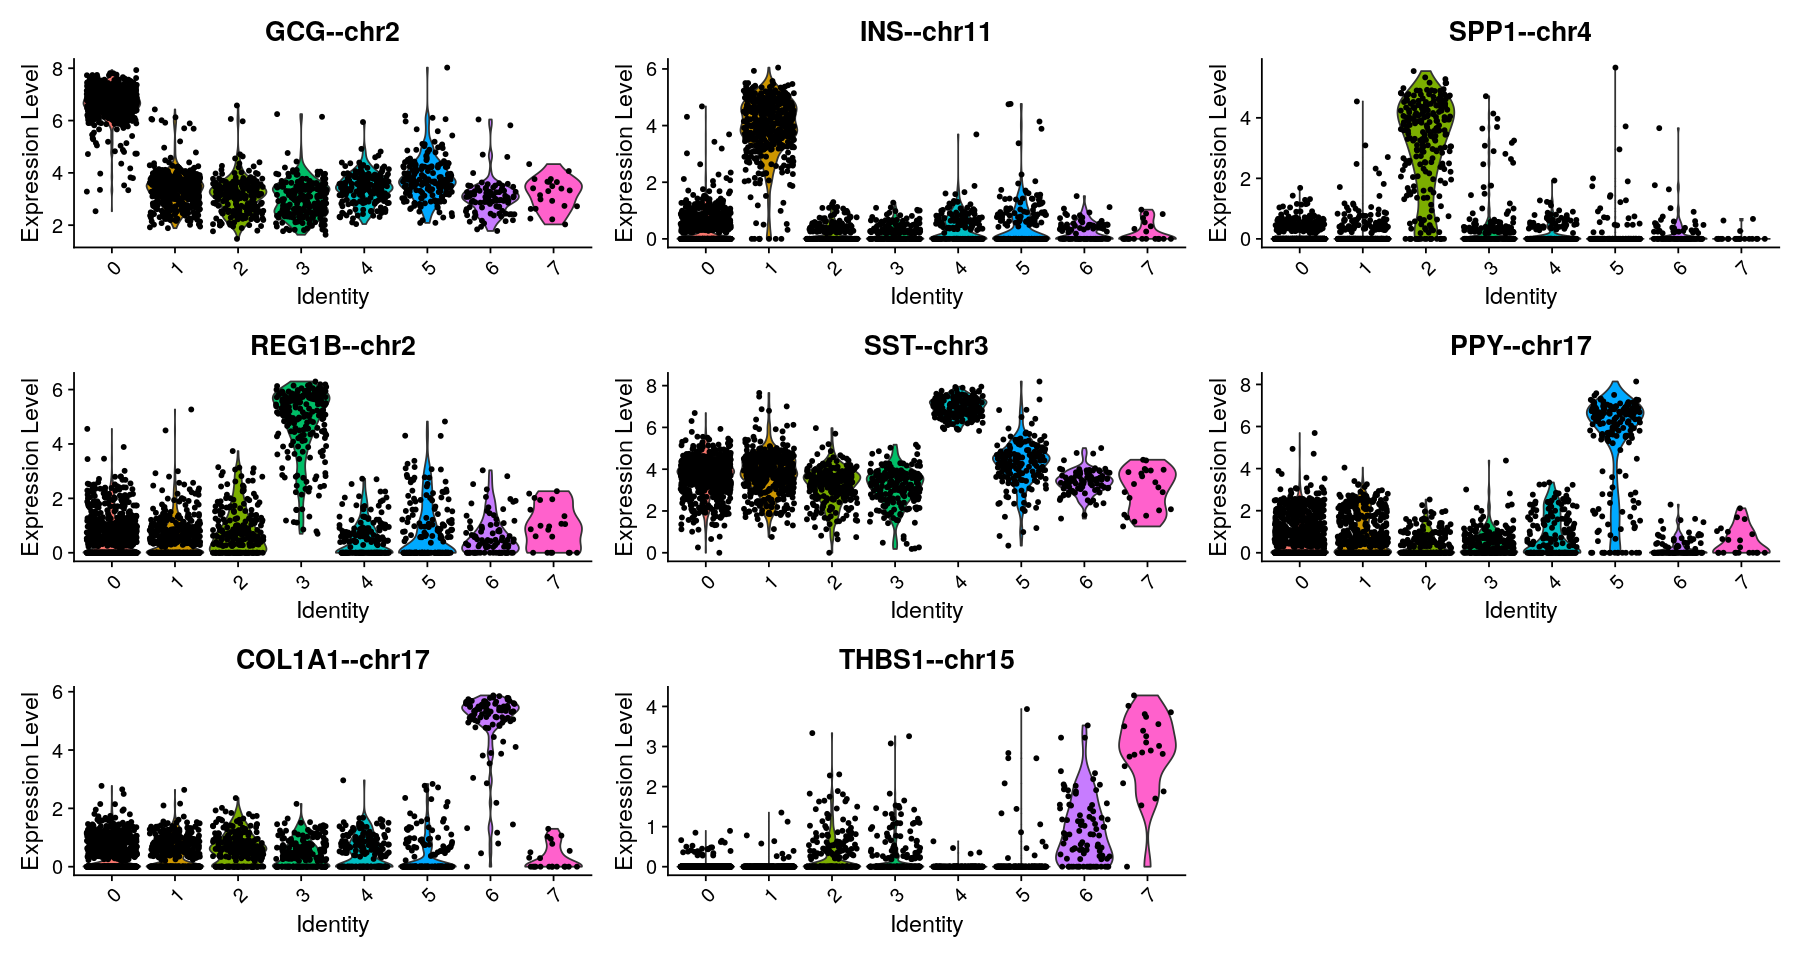

In [55]:
options(repr.plot.width=15, repr.plot.height=8)
GSE_markers_top1 <- GSE_markers_res0.2 %>% group_by(cluster) %>% top_n(n = 1, wt = avg_logFC)
VlnPlot(GSE_seurat_obj, features = GSE_markers_top1$gene)

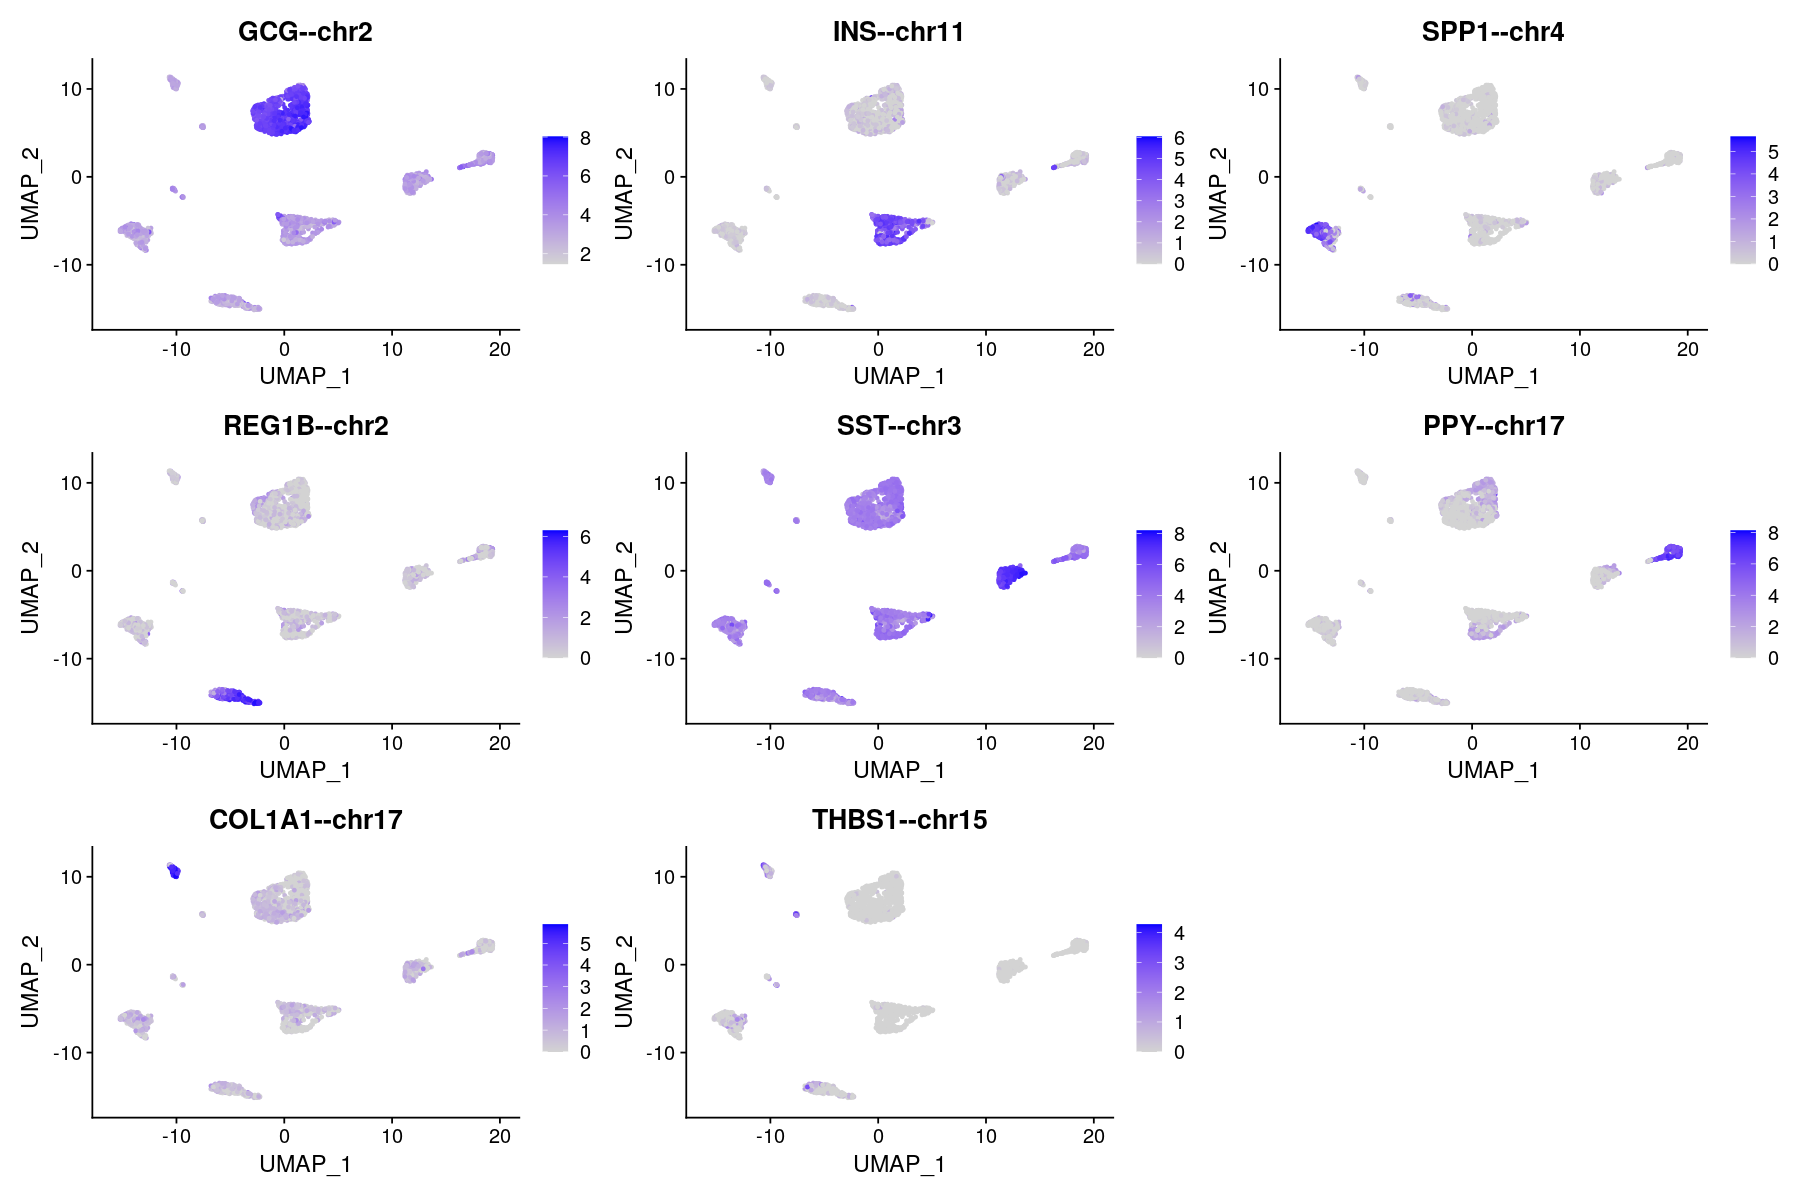

In [56]:
options(repr.plot.width=15, repr.plot.height=10)
FeaturePlot(GSE_seurat_obj, features = GSE_markers_top1$gene)

The top 1 markers for each cluster are clearly linked to a single cluster, based on the VlnPlot and feature plot. These top 1 markers are also clearly indicated in the article as markers that are differentially expressed (Suppementary data).
The SST gene on chromosome 3 is expressed in every cell, but highest in the fifth cluster. Based on the article, this is also the top 1 gene in this cluster.
The THBS1 gene, is also quite high in cluster 7 based on the VlnPlot, but looking at the feature plot it can be seen that this is only a part of cluster 7. Based on the article, THBS1 is not the most expressed gene, but in the top 20, at position 17.

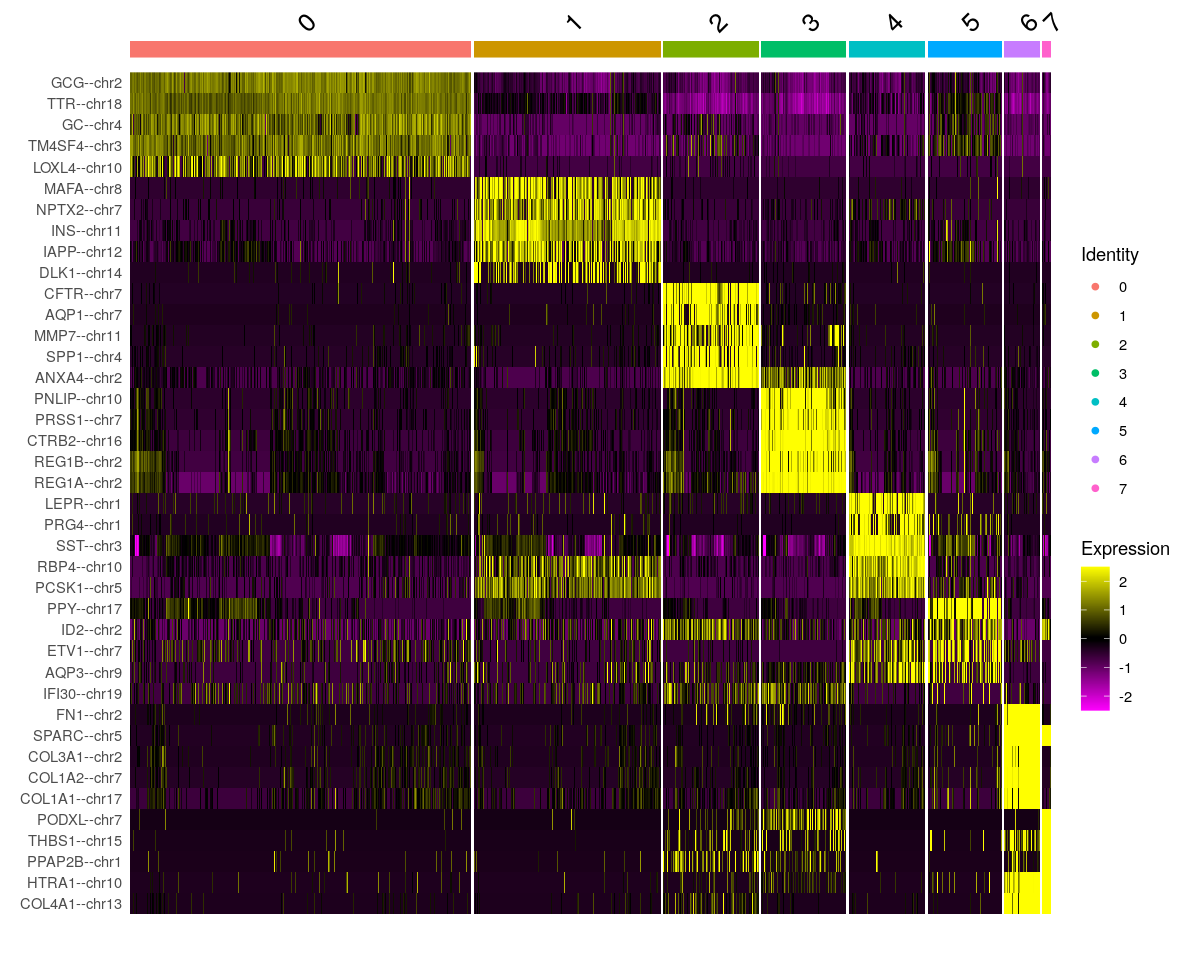

In [57]:
options(repr.plot.width=10, repr.plot.height=8)
DoHeatmap(object = GSE_seurat_obj, features = GSE_markers_top5$gene)

Based on the Heatmap, the clusters from 0 to 5 are very clearly distinguished from each other. Cluster 7 (number 6) also has very clear differences from cluster 8 (number 7), but conversely, the third to fifth genes of cluster 8 are also common in cluster 7.

#### Markers from the article:

Warning message in FetchData(object = object, vars = features, slot = slot):
“The following requested variables were not found: GHRL--chr3, ESAM--chr11”


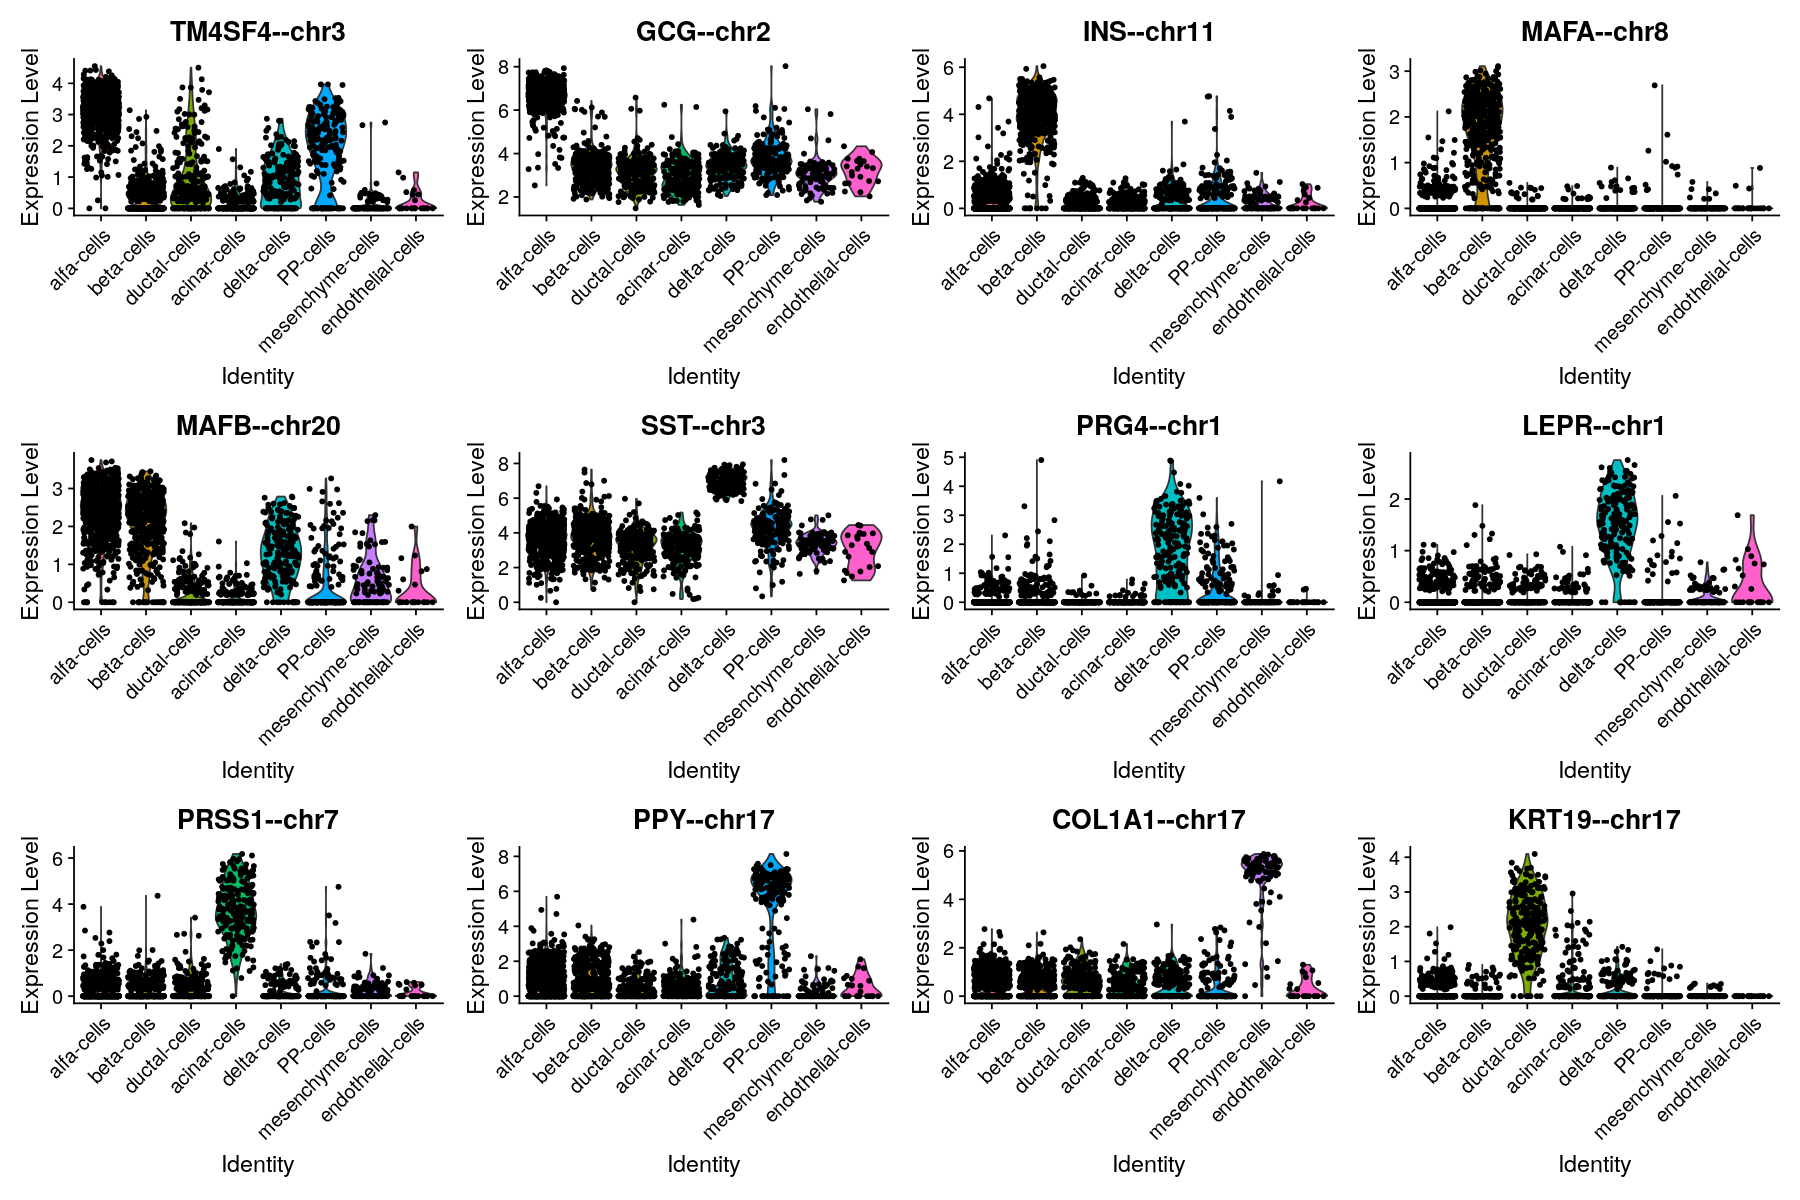

In [77]:
options(repr.plot.width=15, repr.plot.height=10)
GSE_markers_top1 <- GSE_markers_res0.2 %>% group_by(cluster) %>% top_n(n = 1, wt = avg_logFC)
VlnPlot(GSE_seurat_obj, features = c("TM4SF4--chr3",
                                         "GCG--chr2",
                                         "INS--chr11",
                                         "MAFA--chr8",
                                         "MAFB--chr20",
                                         "SST--chr3",
                                         "PRG4--chr1",
                                         "LEPR--chr1",
                                         "PRSS1--chr7",
                                         "PPY--chr17",
                                         "COL1A1--chr17",
                                         "KRT19--chr17",
                                         "GHRL--chr3", 
                                         "ESAM--chr11"))

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: GHRL--chr3, ESAM--chr11”


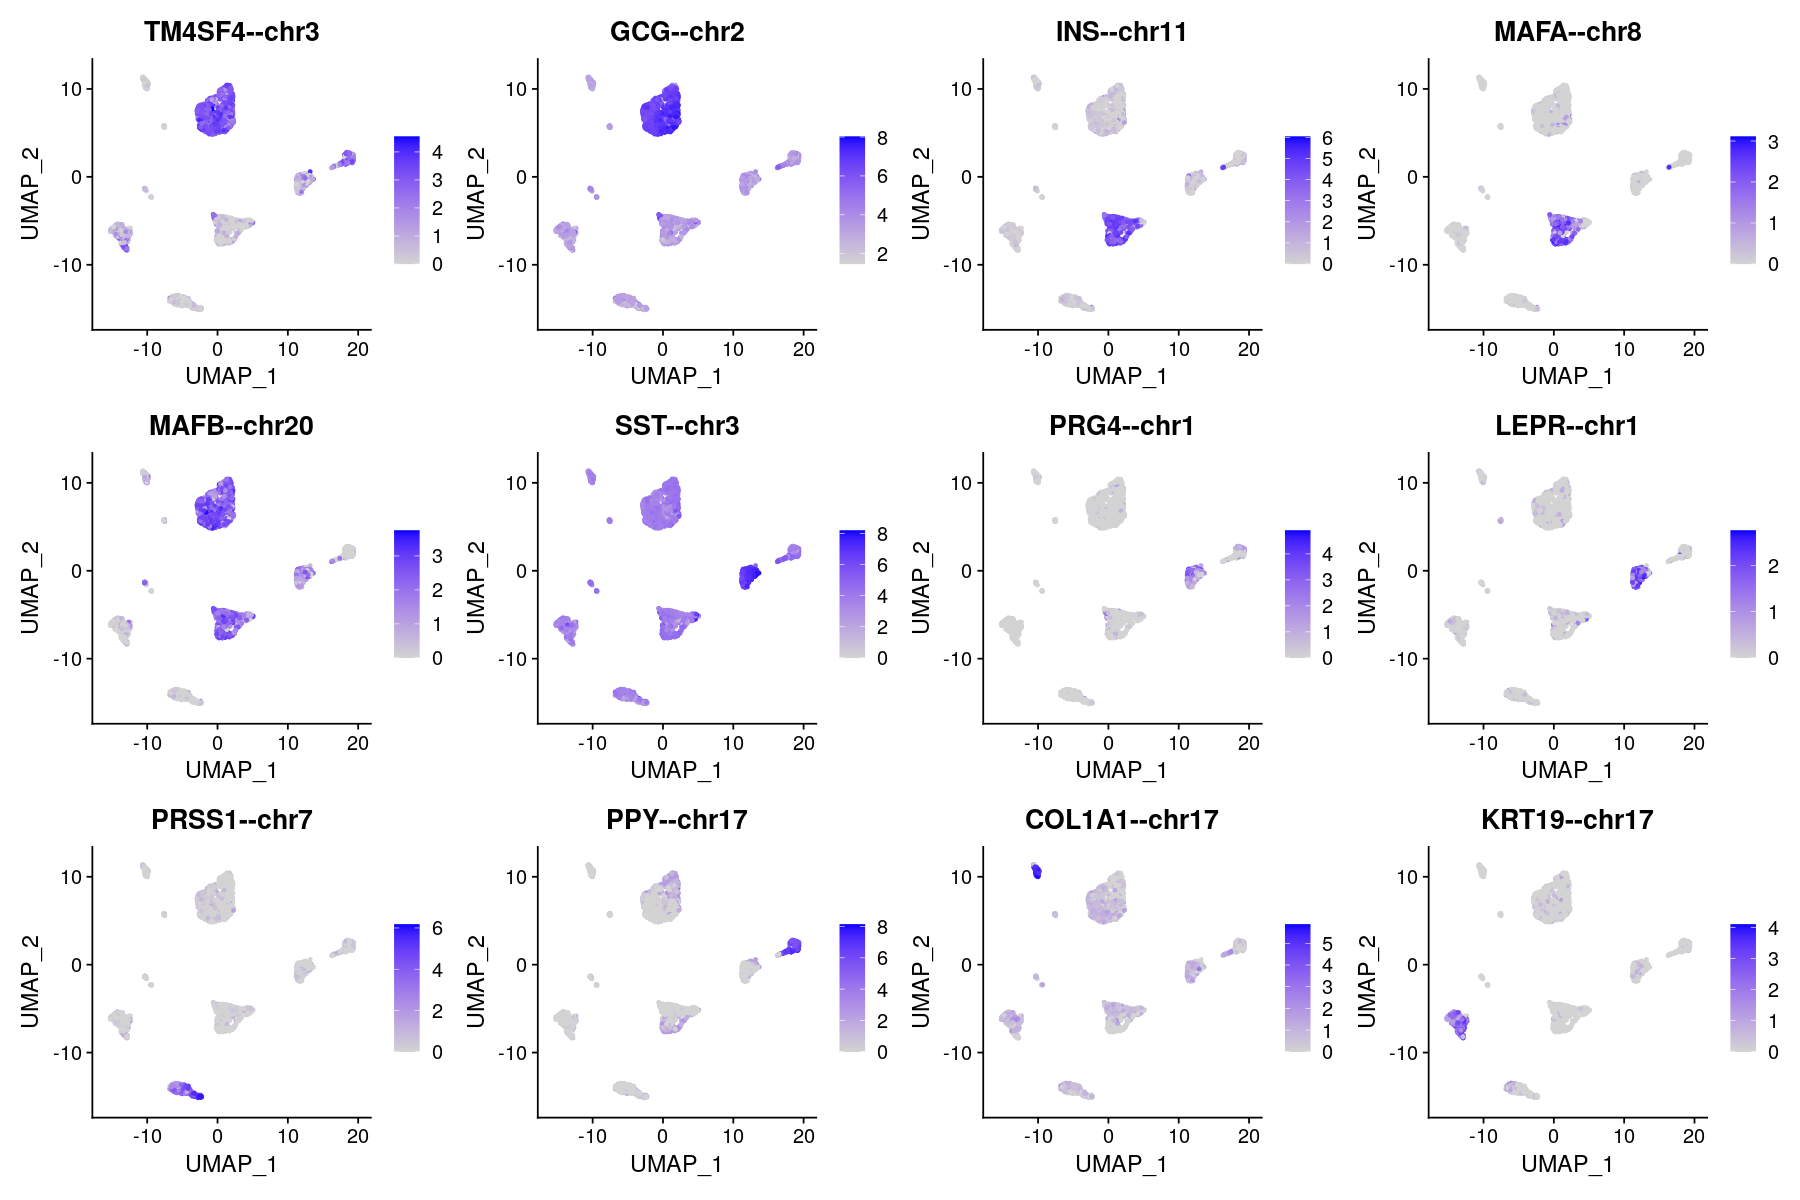

In [78]:
options(repr.plot.width=15, repr.plot.height=10)
FeaturePlot(GSE_seurat_obj, features = c("TM4SF4--chr3",
                                         "GCG--chr2",
                                         "INS--chr11",
                                         "MAFA--chr8",
                                         "MAFB--chr20",
                                         "SST--chr3",
                                         "PRG4--chr1",
                                         "LEPR--chr1",
                                         "PRSS1--chr7",
                                         "PPY--chr17",
                                         "COL1A1--chr17",
                                         "KRT19--chr17",
                                         "GHRL--chr3", 
                                         "ESAM--chr11"))

Based on the VlnPlot and the feature plot of the selected genes from the article, cells can be linked to certain clusters. TM4SF4 and GCG genes are clearly expressed in cluster 1 (number 0), from the article we know that they are expressed in the alpha cells. INS and MAFA genes are expressed in beta cells. MAFB gene is expressed in alpha and beta cells, which can be seen very clearly in the VlnPlot. The SST gene, which according to the article was very clear, was not very clear to me here, which is why I also added the PRG4 and LEPR gene in the figures. These three genes are strongly linked to the delta cells. PRSS1 is linked to the acinar cells, COL1A1 to the mesenchymal cells, KRT19 to the ductal cells. GHRL and ESAM genes linked in the article to epsilon and endothelial cells are removed from the dataset during selection and normalization. Therefore, the supplemental data to the article and the top 5 genes from this analysis were looked at to decide which cells cluster 8 (number 7) was linked to. From this data we were able to link this cluster to the endothelial cells.

Warning message in FetchData(object = object, vars = features, slot = slot):
“The following requested variables were not found: GHRL--chr3, ESAM--chr11”
Picking joint bandwidth of 0.171

Picking joint bandwidth of 0.19

Picking joint bandwidth of 0.141

Picking joint bandwidth of 0.027

Picking joint bandwidth of 0.162

Picking joint bandwidth of 0.237

Picking joint bandwidth of 0.0745

Picking joint bandwidth of 0.0621

Picking joint bandwidth of 0.14

Picking joint bandwidth of 0.26

Picking joint bandwidth of 0.152

Picking joint bandwidth of 0.0525



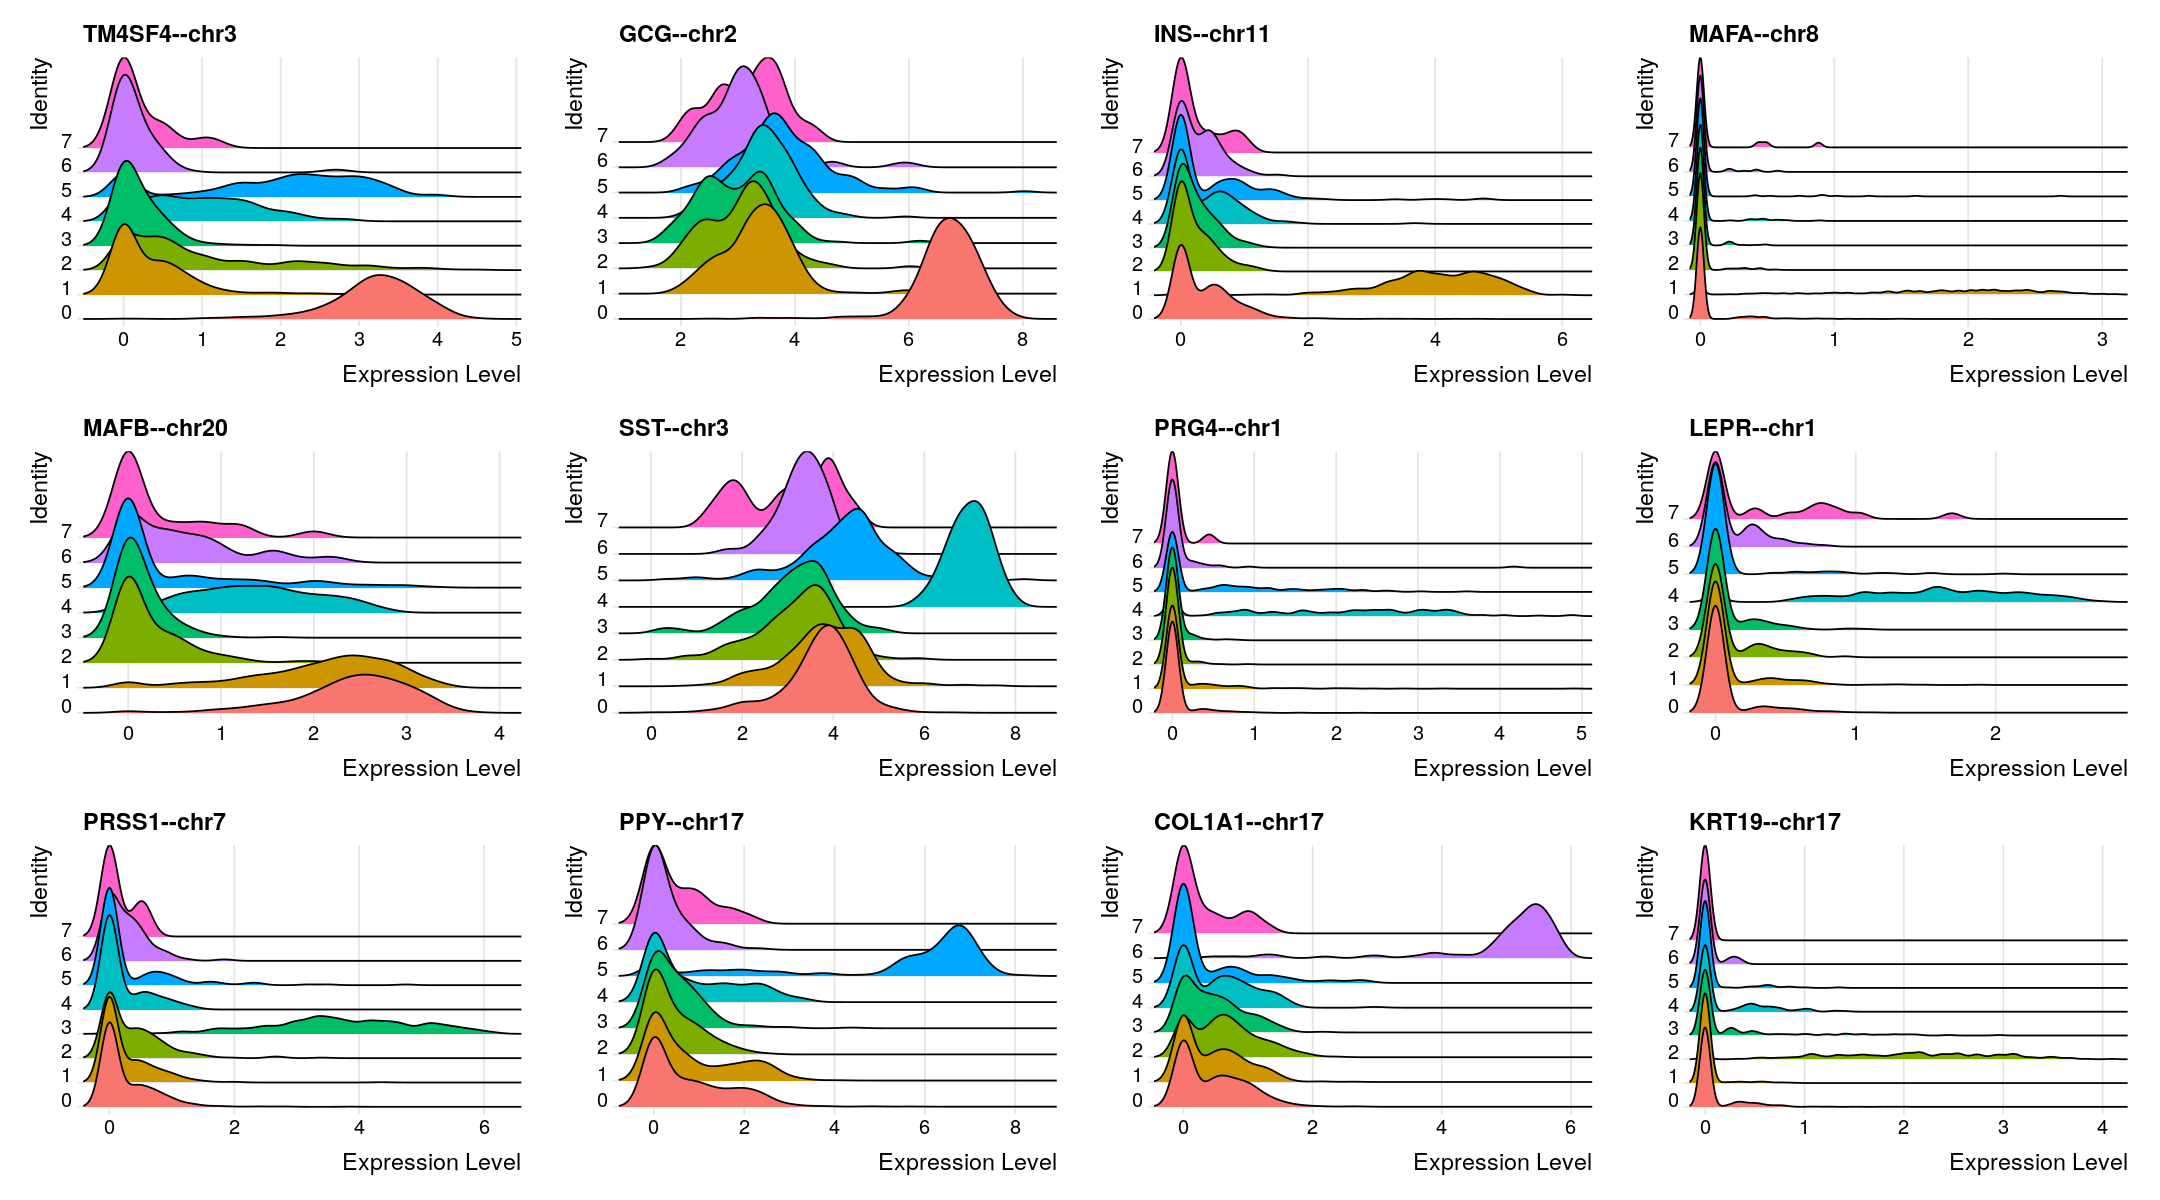

In [75]:
options(repr.plot.width=18, repr.plot.height=10)
RidgePlot(GSE_seurat_obj, features = c("TM4SF4--chr3",
                                         "GCG--chr2",
                                         "INS--chr11",
                                         "MAFA--chr8",
                                         "MAFB--chr20",
                                         "SST--chr3",
                                         "PRG4--chr1",
                                         "LEPR--chr1",
                                         "PRSS1--chr7",
                                         "PPY--chr17",
                                         "COL1A1--chr17",
                                         "KRT19--chr17",
                                         "GHRL--chr3", 
                                         "ESAM--chr11"), group.by = "RNA_snn_res.0.2" )

As a final visualization, a RidgePlot was created. This plot gives a clear indication of the expression level. Remarkably, the expression level of the SST gene is high in all cells, but it is high in the 5th cluster, with a value of 8, which is the high expression level value in these examples.

## 12. Assinging cell type identity to cluser
From the article and the data obtained from this analysis, clusters can be linked to cells (above).

In [61]:
new.clusters.ids <- c("alfa-cells", "beta-cells", "ductal-cells", "acinar-cells", "delta-cells", "PP-cells", "mesenchyme-cells", "endothelial-cells")
current.clusters.ids <- c(0:7)

In [62]:
GSE_seurat_obj@active.ident <- plyr::mapvalues(x=GSE_seurat_obj@active.ident, from=current.clusters.ids, to=new.clusters.ids)

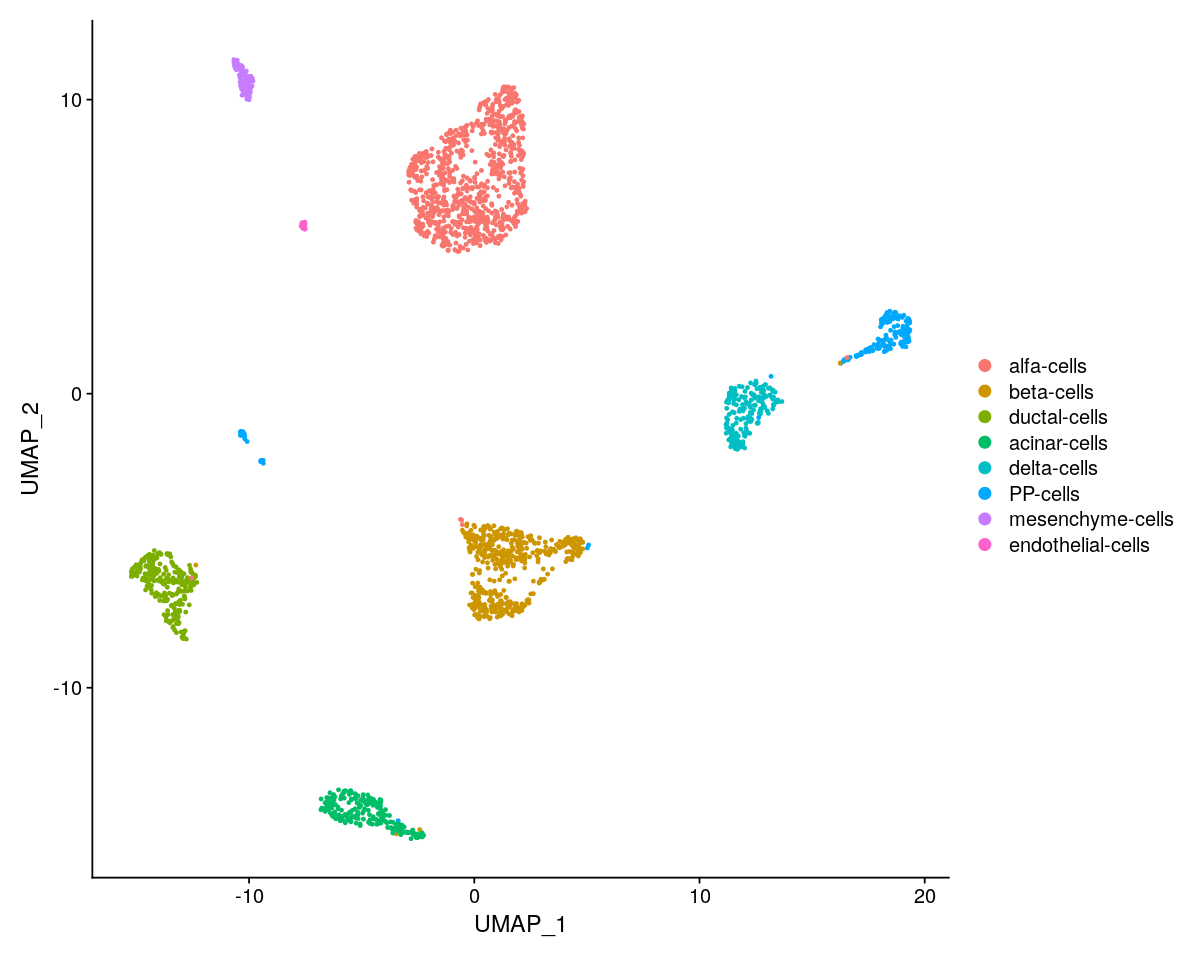

In [63]:
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(GSE_seurat_obj, reduction = "umap")

In [64]:
GSE_seurat_obj@meta.data$CellType <- Idents(GSE_seurat_obj)

In [65]:
names(GSE_seurat_obj@meta.data)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "donor"          
[5] "plate"           "RNA_snn_res.0.5" "seurat_clusters" "RNA_snn_res.0.2"
[9] "CellType"

## 13. Differential expression testing between alfa and beta cells

In this step we only look at the differential expressed genes between alfa en beta-cells and not at all cells. 

In [66]:
levels(GSE_seurat_obj)

[1] "alfa-cells"        "beta-cells"        "ductal-cells"     
[4] "acinar-cells"      "delta-cells"       "PP-cells"         
[7] "mesenchyme-cells"  "endothelial-cells"

In [67]:
alfa_beta_DEG <- FindMarkers(GSE_seurat_obj, ident.1 = 'alfa-cells', ident.2 = 'beta-cells')

In [68]:
alfa_beta_DEG[0:15,]

p_val         avg_logFC pct.1 pct.2 p_val_adj    
TGFBR3--chr1   5.521555e-210 -1.404223 0.060 0.887 5.682233e-206
PDX1--chr13    3.927675e-207 -1.848871 0.149 0.932 4.041971e-203
HADH--chr4     1.414215e-205 -2.181828 0.336 0.981 1.455368e-201
SCD5--chr4     2.555032e-204 -1.882411 0.201 0.947 2.629384e-200
NPTX2--chr7    6.135037e-202 -2.150821 0.211 0.951 6.313566e-198
ADCYAP1--chr18 4.257001e-201 -1.416940 0.073 0.875 4.380880e-197
MAFA--chr8     1.060805e-199 -1.861444 0.121 0.904 1.091675e-195
TTR--chr18     1.111471e-197  2.000793 1.000 1.000 1.143815e-193
TM4SF4--chr3   3.222111e-197  2.778612 0.998 0.478 3.315875e-193
GCG--chr2      3.295499e-196  3.150092 1.000 1.000 3.391398e-192
TIMP2--chr17   9.770804e-196 -1.892666 0.314 0.979 1.005513e-191
INS--chr11     1.971313e-192 -3.649249 0.504 0.983 2.028678e-188
IRX2--chr5     1.343970e-191  1.535690 0.974 0.121 1.383080e-187
FAP--chr2      8.507703e-191  1.856310 0.971 0.138 8.755277e-187
PRSS23--chr11  2.085415e-190 -1.340085 0.171 0.924 2.146100e-186

These results represent the most differential expressed genes in the two cells (alfa and beta). We see genes that often returned during the analysis, such as MAFA, TTR, TM4SF4, GCG and INS.

## 14. Loom file & visualisation

In [69]:
GSE_loom <- build_loom(file.name = "GSE_seurat_obj.loom", 
                        dgem = as.matrix(GSE_seurat_obj[["RNA"]]@counts),
                        title = "Pancreas Human Dataset",
                        genome="Human",
                        default.embedding = GSE_seurat_obj@reductions$tsne@cell.embeddings,
                        default.embedding.name = "tSNE on variable genes")

add_col_attr(GSE_loom, key = "CellType",
                value = as.vector(GSE_seurat_obj@meta.data$CellType),
                as.annotation = T)
add_col_attr(GSE_loom, key = "Donor",
                value = as.vector(GSE_seurat_obj@meta.data$donor),
                as.annotation = T)

finalize(GSE_loom)

[1] "Adding global attributes..."
[1] "Adding matrix..."
  |======================================================================| 100%[1] "Adding column attributes..."


Warning message in doTryCatch(return(expr), name, parentenv, handler):
“Default metric nUMI was not added because the input matrix does not seem to be the raw counts.”


[1] "Adding default metrics nGene..."
[1] "Adding default embedding..."
[1] "Adding row attributes..."
[1] "Adding columns graphs..."
[1] "Adding row graphs..."
[1] "Adding layers..."


In [70]:
head(GSE_seurat_obj@meta.data)

orig.ident nCount_RNA nFeature_RNA donor plate RNA_snn_res.0.5
D28.1_1  D28.1      23175.90   5214         D28   1     0              
D28.1_2  D28.1      29530.57   5923         D28   1     11             
D28.1_3  D28.1      16959.13   4965         D28   1     5              
D28.1_4  D28.1      33613.39   6886         D28   1     3              
D28.1_5  D28.1      14044.97   4364         D28   1     2              
D28.1_13 D28.1      22890.73   5550         D28   1     2              
         seurat_clusters RNA_snn_res.0.2 CellType         
D28.1_1  0               0               alfa-cells       
D28.1_2  7               7               endothelial-cells
D28.1_3  4               4               delta-cells      
D28.1_4  1               1               beta-cells       
D28.1_5  2               2               ductal-cells     
D28.1_13 2               2               ductal-cells

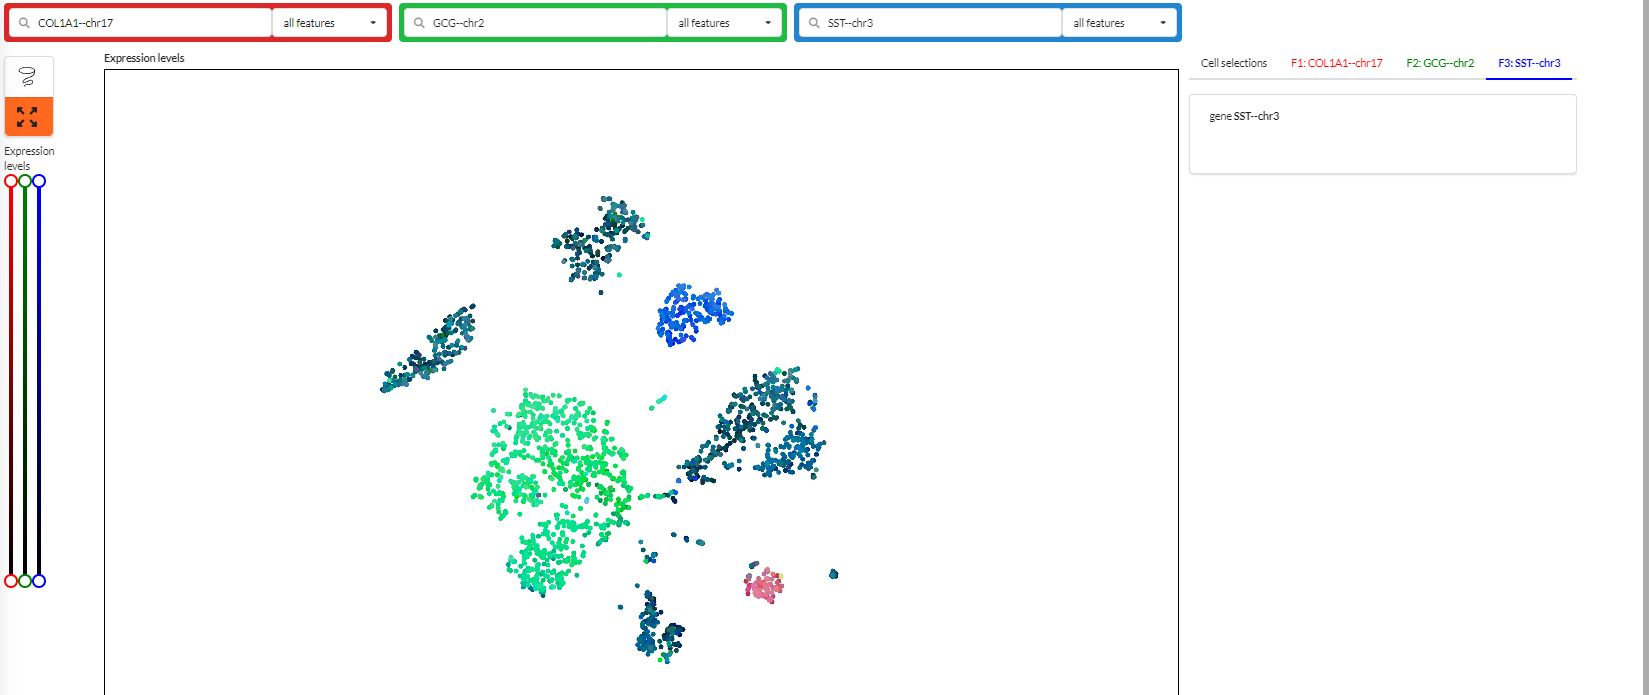

In [71]:
IRdisplay::display_png(file = "SCOPE-screenshot.JPG")

## 15. GO enrichment

In [120]:
cluster_0 <- subset(GSE_markers_res0.2, cluster == 0, select=c("avg_logFC"))
genes_cluster0 <- rownames(cluster_0)
genes_cluster0 <- sub("--[^-]+$","",genes_cluster0)
cluster_0$genes_cluster0 <- genes_cluster0
cluster0 <- cluster_0[, c(2,1)]

cluster_1 <- subset(GSE_markers_res0.2, cluster == 1, select=c("avg_logFC"))
genes_cluster1 <- rownames(cluster_1)
genes_cluster1 <- sub("--[^-]+$","",genes_cluster1)
cluster_1$genes_cluster1 <- genes_cluster1
cluster1 <- cluster_1[, c(2,1)]

write.table(cluster0, file = "markers_cluster_0.txt", sep = "\t", quote = F, col.names = F, row.names = F)
write.table(cluster1, file = "markers_cluster_1.txt", sep = "\t", quote = F, col.names = F, row.names = F)

#### gProfiler: Alpha cells

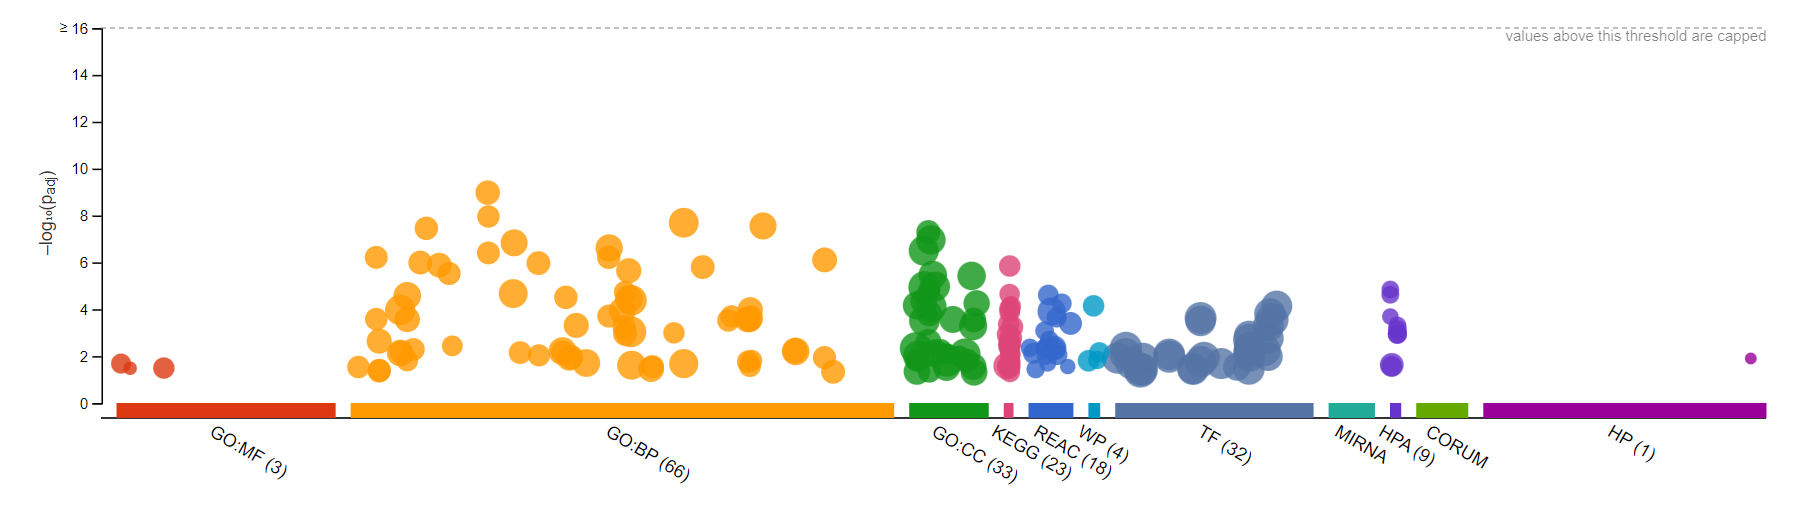

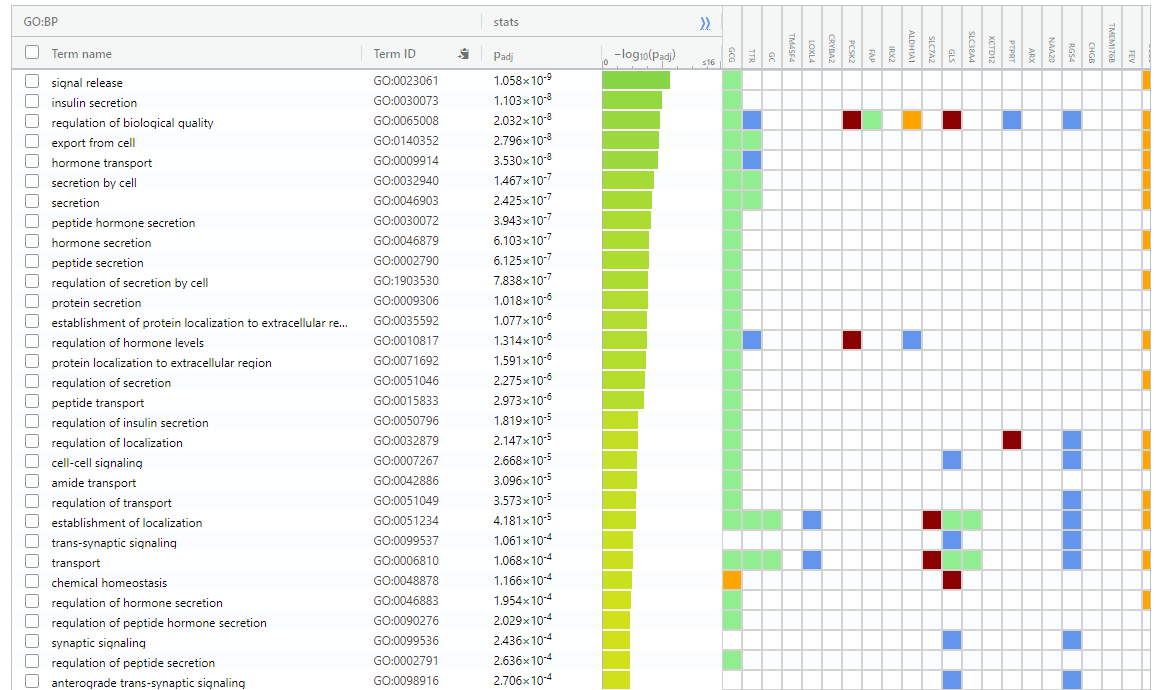

#### GO enrichment Network: Alpha Cells
use: https://tools.dice-database.org/GOnet/

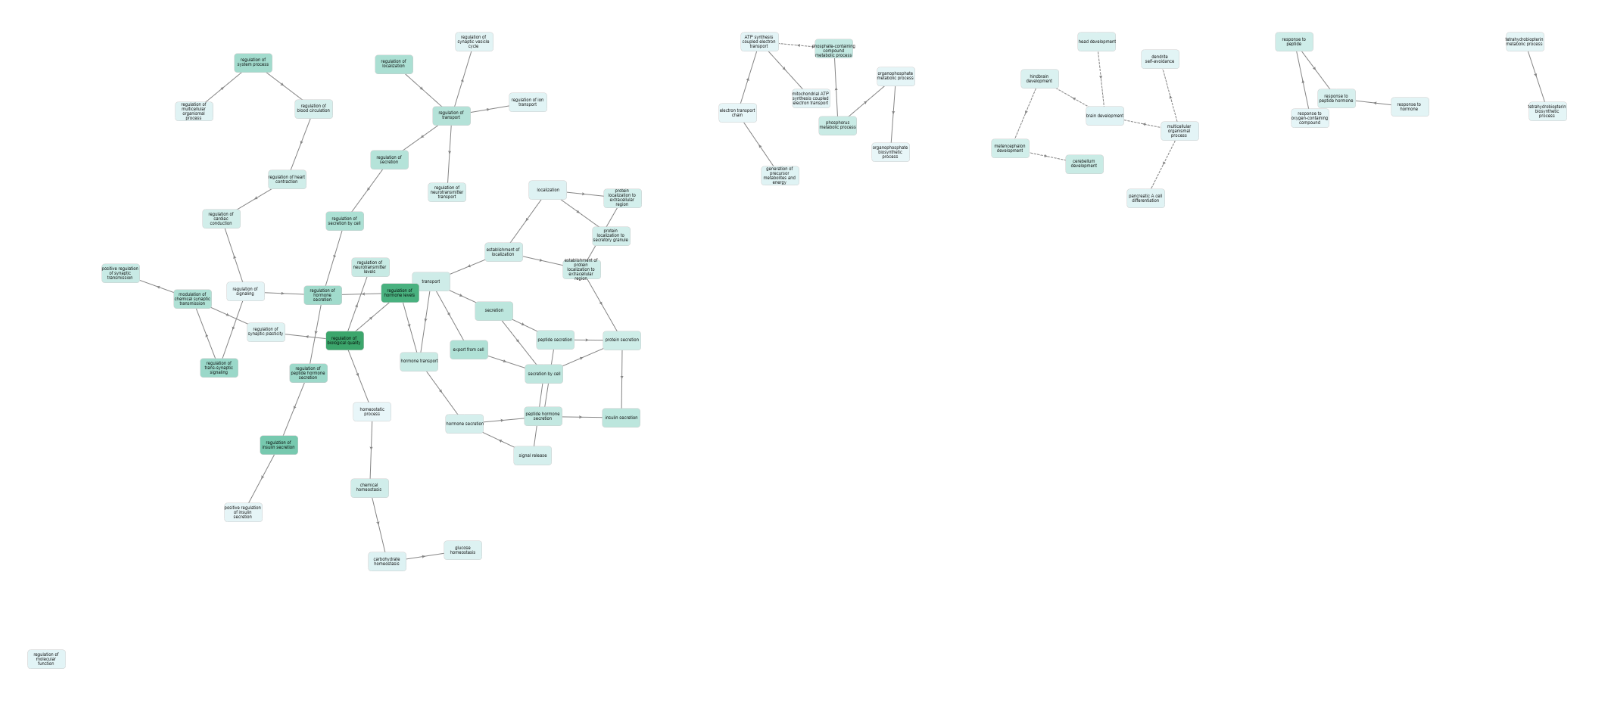

Zoom in: 
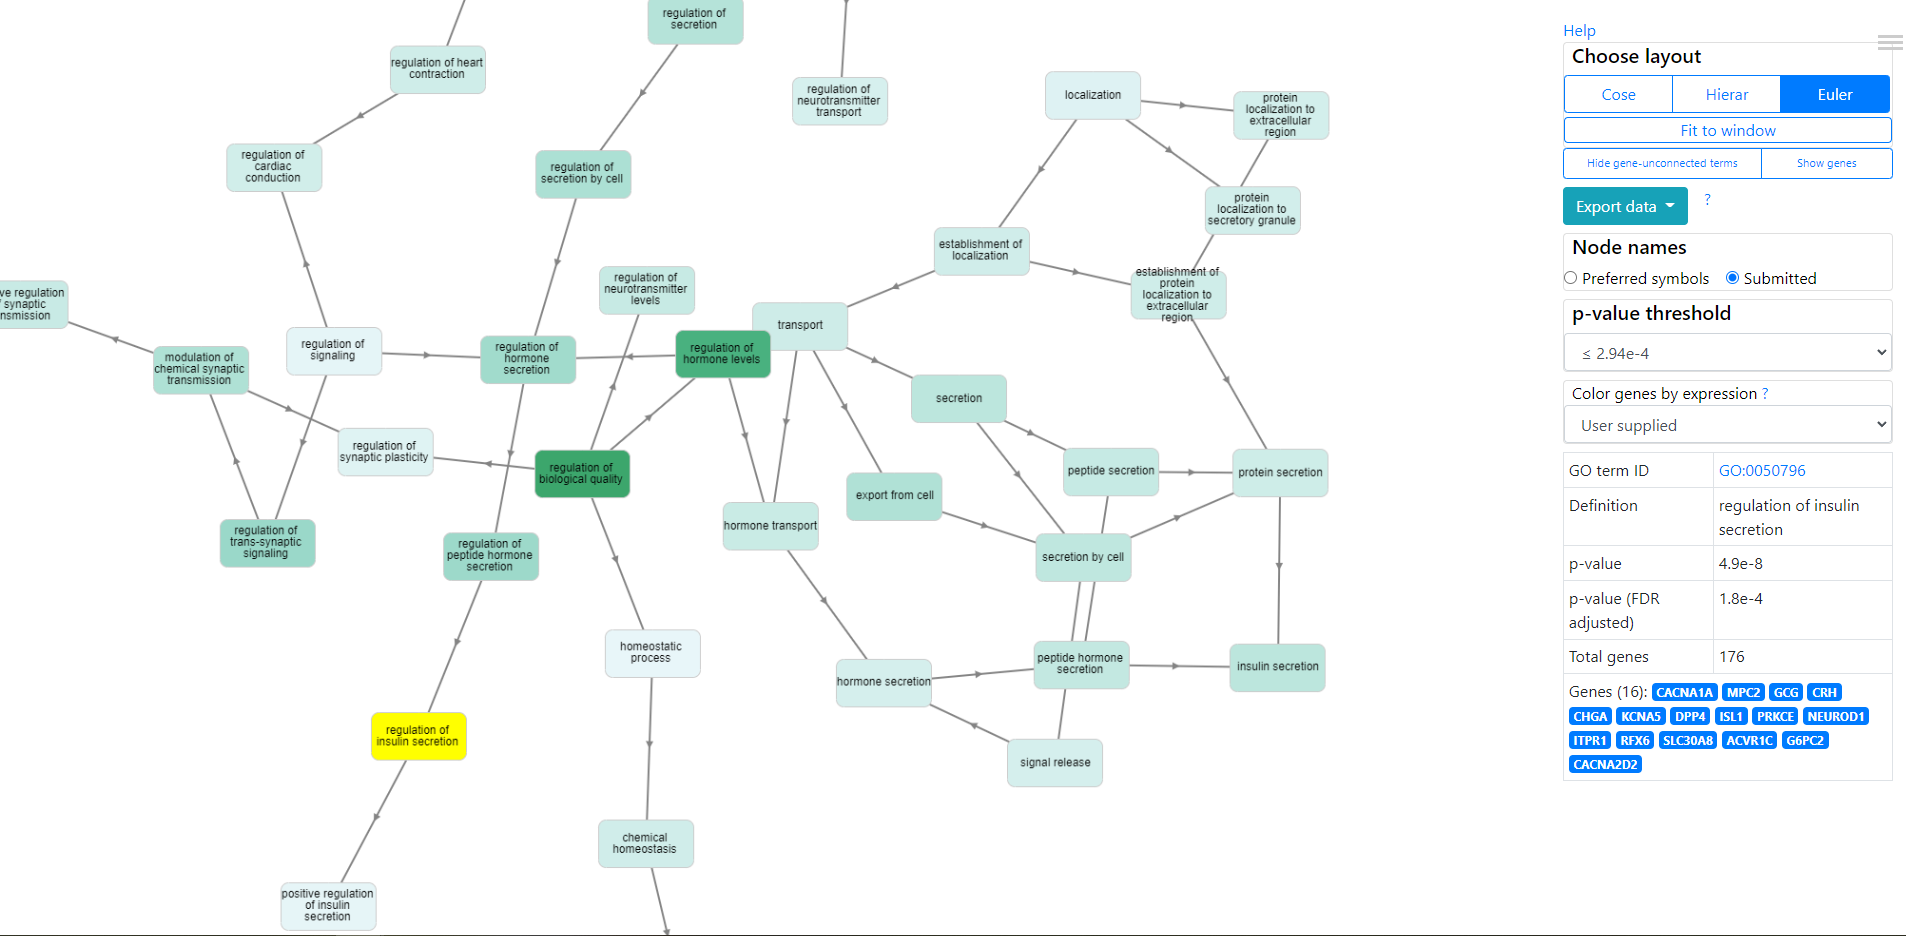

These GO terms are similar as the once found with gProfiler.

#### gProfiler: Beta cells

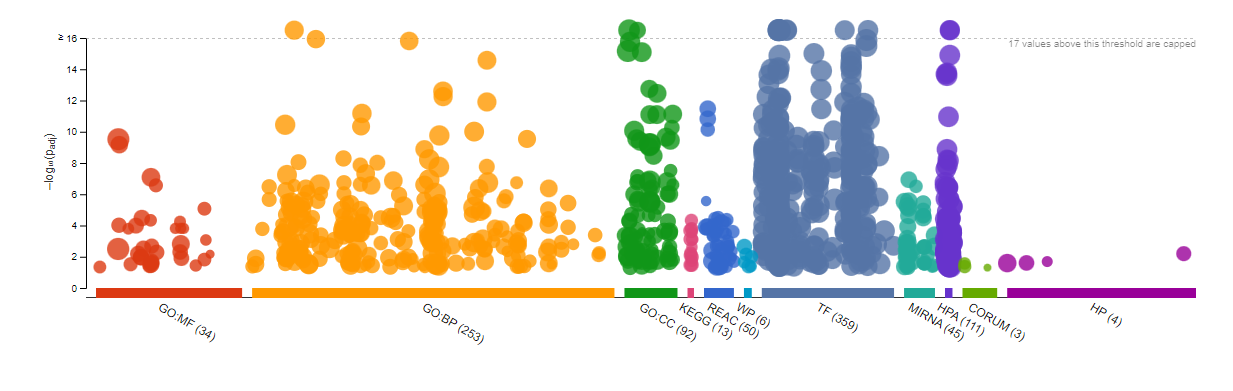

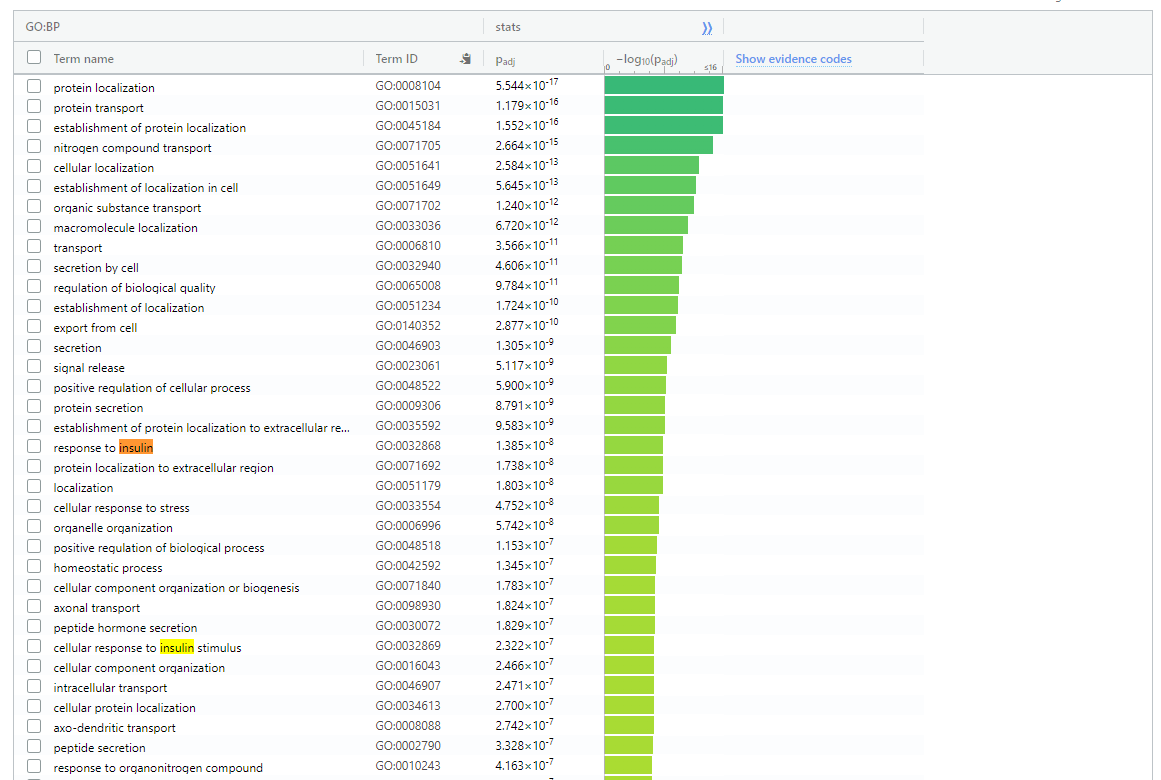

#### GO enrichment Network: Beta cells

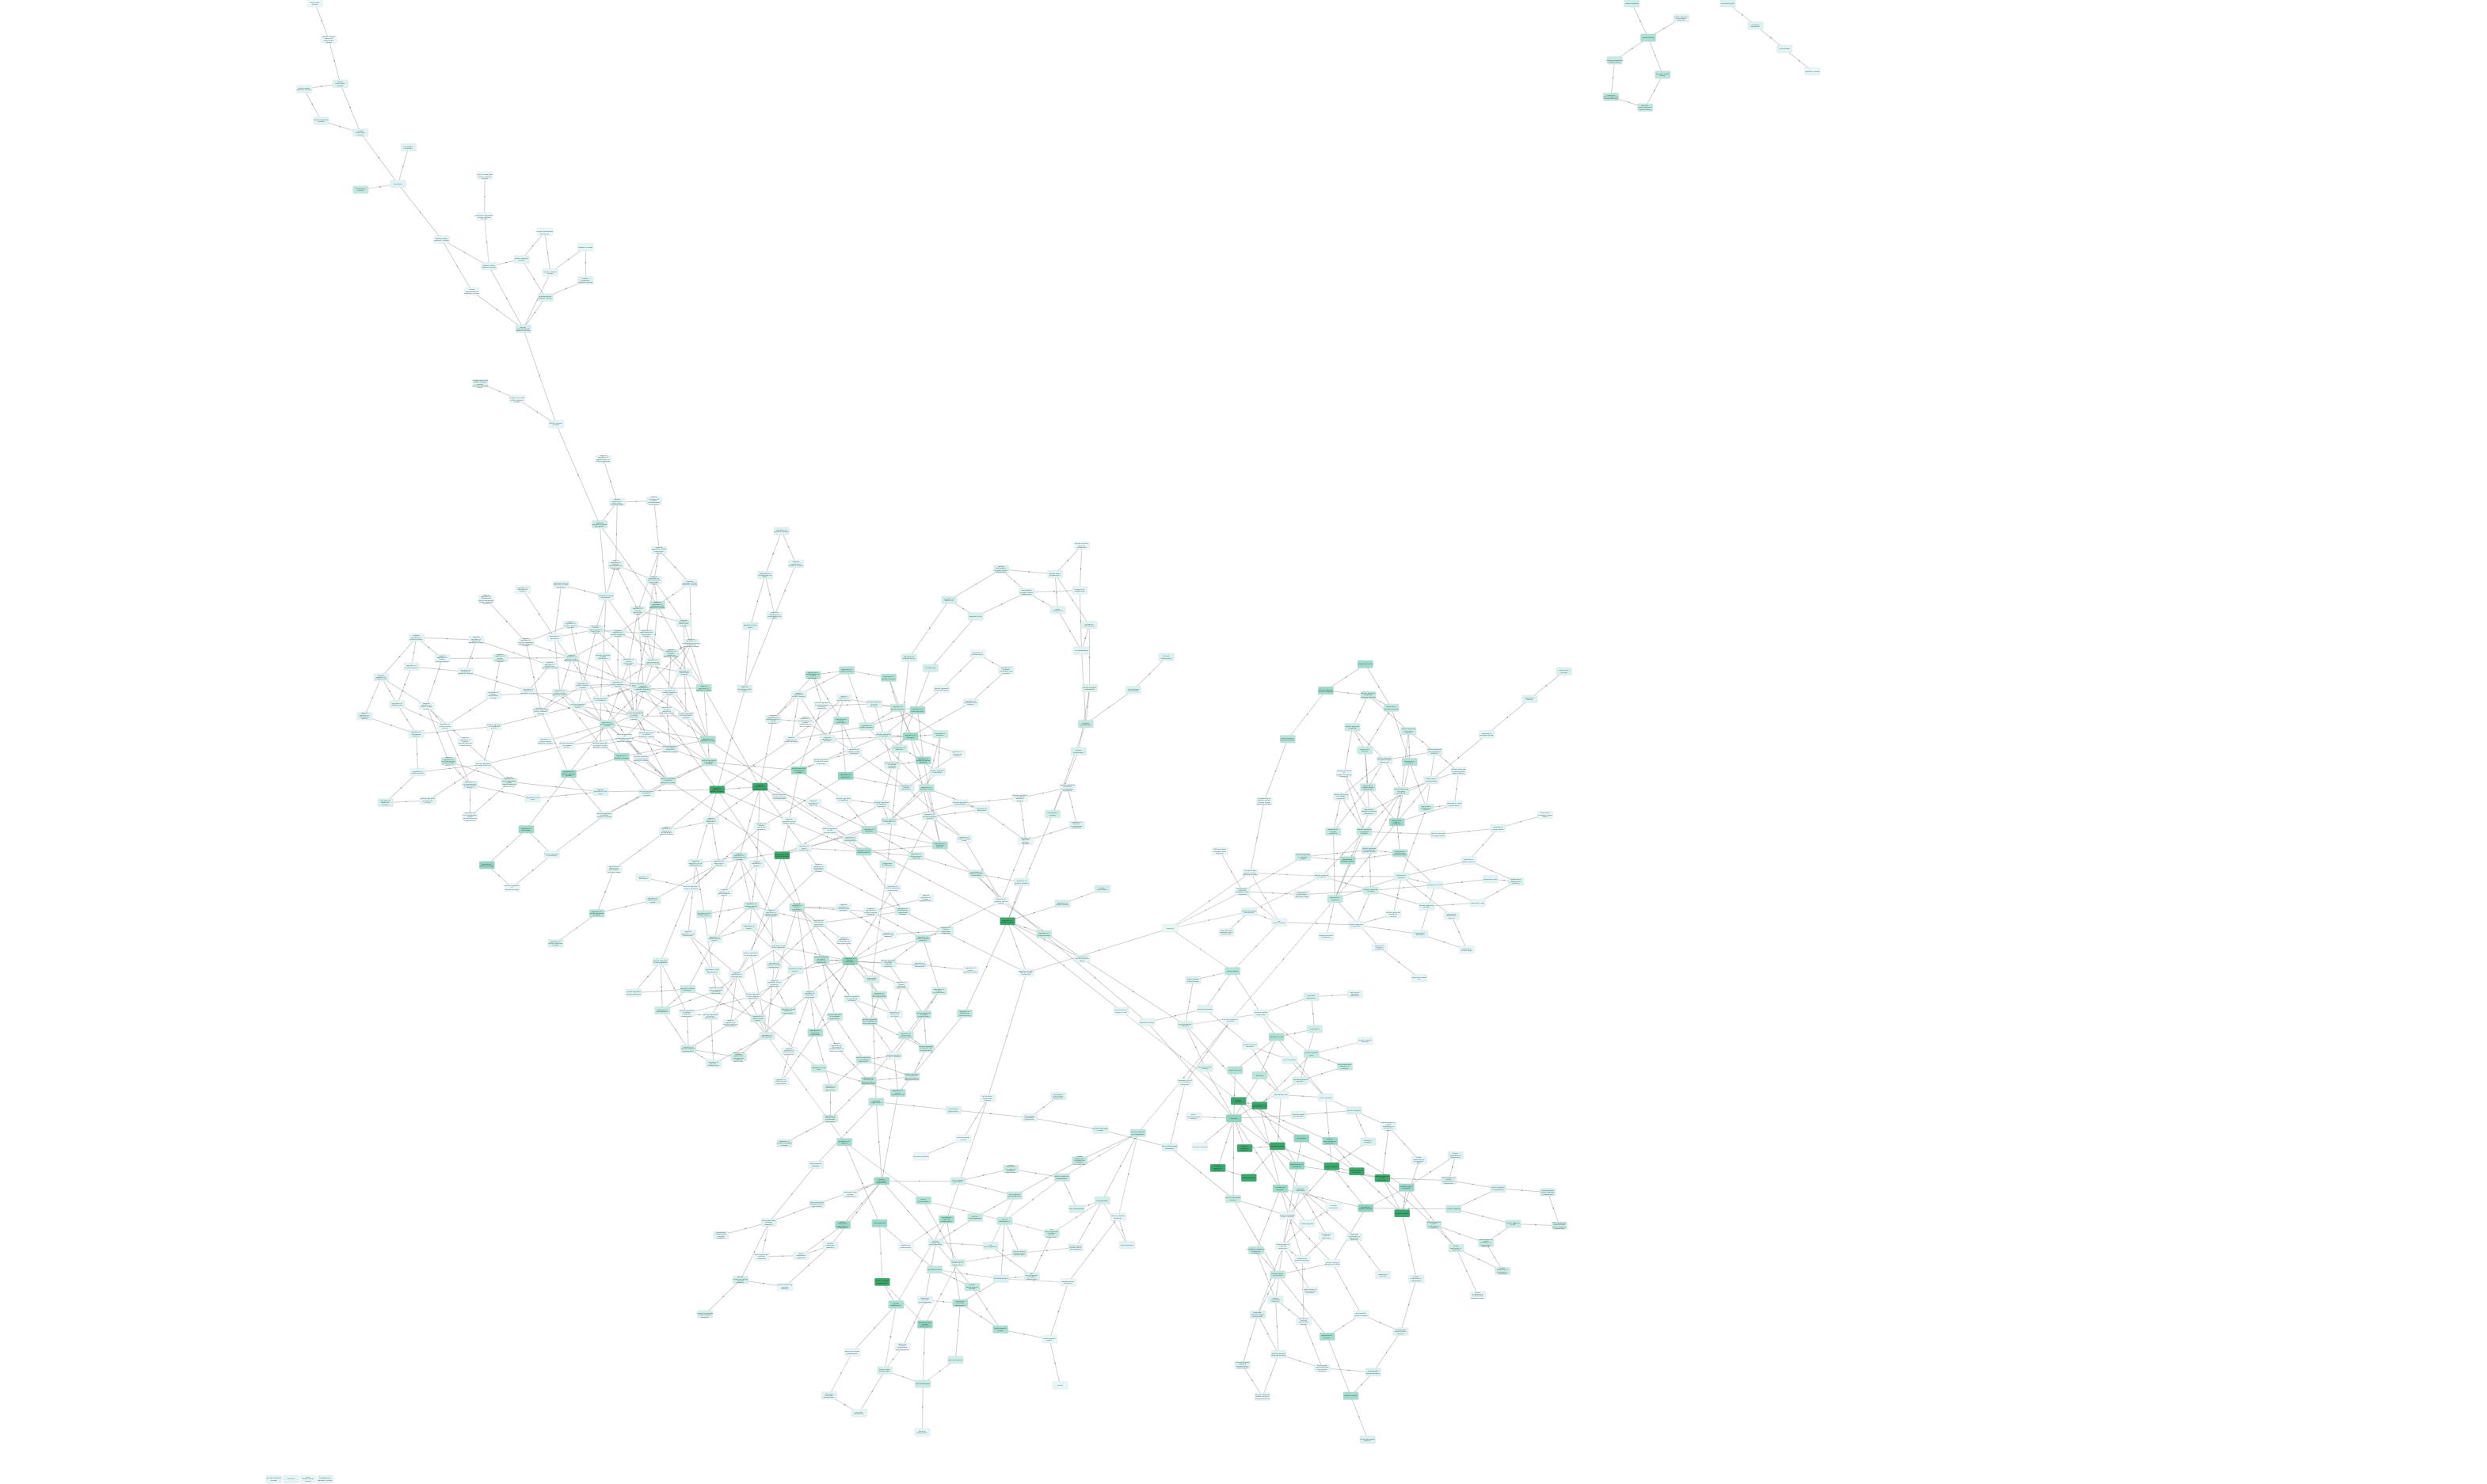

The GO enrichment network of the Beta cells is larger, but there are also more genes connected to the Beta cells.

## 16. Conclusion
Using single cell RNA sequencing, the different cells of the pancreas could be separated by using differential expression of genes. For this analysis, a count matrix is started. The dataset consisted of 4 donors, 3 males and 1 female. From these, 8 samples were taken each time. A quality control was performed and the count matrix was normalized. Higly variable genes were identified. To cluster the data, a dimension reduction was first performed using PCA. Important genes mentioned in the accompanying article could show a distinction based on the first and second principal components. Subsequently, these results were further used to cluster the data. Differential expression markers were sought for each cluster and compared with the markers from the article. Using this data, cells were linked to clusters. Finally, the alpha cells were compared with the beta cells, by differential expression testing. Similar genes were found from this as in the article. Based on the article, the same cells (alpha, beta, ...) were found after clustering methods. Several GO terms associated with alpha and beta cells were found.

In [123]:
save(file="GSE_Assignment_IreneClaes.RData", GSE_seurat_obj)

In [122]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.7.1
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.7.1

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scales_1.1.1                DESeq2_1.24.0              
 [3] SummarizedExperiment_1.14.1 DelayedArray_0.10.0        
 [5] BiocParallel_1.18.1         matrixStats_0.57.0         
 [7] Biobase_2.44.0              GenomicRanges_1.36.1       
